# Introduction
    
Cross-selling is a sales technique used by businesses to offer complementary or related products or services to customers.Cross-selling is used to increase revenue and profit margins by encouraging customers to purchase additional products or services that complement their initial purchase. <a> https://www.bain.com/insights/reinvigorate-cross-selling/</a>


In this case, we are cross-selling wines to our customers that purchase food from apprentice chef.

 
## Objective
This study aims to build a predictive model to predict cross-sell success

## Assumptions
•	Approximately 2,000 datasets
•	Customers made at least one purchase per month for 11 of their first 12 months.
•	Customers made at least one purchase per quarter and at least 15 purchases throughout their first year.
 
## Data Analysis Outline
1.	Importing necessary libraries
2.	Data exploration and feature engineering
3.  Data Preparation
4.	Building Models


## Importing the necessary libraries
Importing all the packages that will be used in creating a model

In [518]:
# importing libraries
import pandas            as pd                       # data science essentials
import numpy             as np
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split

from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression

from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.metrics import make_scorer              # customizable scorer

from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.model_selection import GridSearchCV     # hyperparameter tuning

from sklearn.preprocessing import StandardScaler     # standard scaler

from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm



# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = './Cross_Sell_Success_Dataset_2023.xlsx'


# reading the file into Python
cross_sell = pd.read_excel(file)



## User Defined Functions

In [519]:
#defining a function to display the top n models from tuning, based on "rank_test_score".

def tuning_results(cv_results, n=5):
    """
This function will display the top "n" models from hyperparameter tuning,
based on "rank_test_score".

PARAMETERS
----------
cv_results = results dictionary from the attribute ".cv_results_"
n          = number of models to display
    """
    param_lst = []

    for result in cv_results["params"]:
        result = str(result).replace(":", "=")
        param_lst.append(result[1:-1])


    results_df = pd.DataFrame(data = {
        "Model_Rank" : cv_results["rank_test_score"],
        "Mean_Test_Score" : cv_results["mean_test_score"],
        "SD_Test_Score" : cv_results["std_test_score"],
        "Parameters" : param_lst
    })


    results_df = results_df.sort_values(by = "Model_Rank", axis = 0)
    return results_df.head(n = n)

In [520]:
#CART model 
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [521]:
########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [522]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
x_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the x data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1




# Data Exploration and Feature Engineering

Analyzing the data, treating anomalies like missing numbers and transforming data to improve skewness and creating new features that may improve the model.

In [523]:
# outputting the first 5 rows of the dataset
cross_sell.head(n=5)


,CROSS_SELL_SUCCESS,EMAIL,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED
0,1,steffon.baratheon@yahoo.com,4920.0,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456
1,0,harlon.greyjoy@visa.com,6150.0,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680
2,0,monster@protonmail.com,3435.0,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145
3,1,damon.lannister.(lord)@yahoo.com,3330.0,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418
4,1,raynald.westerling@jnj.com,3427.5,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174


In [524]:
# formatting and printing the dimensions of the dataset
# This shows number of  observations (rows) and features (columns) that are present in the dataset.

print(f"""
Size of Original Dataset
------------------------
Observations: {cross_sell.shape[0]}
Features:     {cross_sell.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 1946
Features:     17



In [525]:
# InfOrmation about each variable, including types and the number of missing values.¶
cross_sell.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CROSS_SELL_SUCCESS           1946 non-null   int64  
 1   EMAIL                        1946 non-null   object 
 2   REVENUE                      1946 non-null   float64
 3   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 4   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 5   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 6   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 7   AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 8   CANCELLATIONS_AFTER_NOON     1946 non-null   int64  
 9   PC_LOGINS                    1946 non-null   int64  
 10  MOBILE_LOGINS                1946 non-null   int64  
 11  WEEKLY_PLAN                  1946 non-null   int64  
 12  LATE_DELIVERIES              1946 non-null   int64  
 13  AVG_PREP_VID_TIME 

In [526]:
# descriptive statistics for numeric data
cross_sell.describe(include = 'number').round(decimals = 2)

,CROSS_SELL_SUCCESS,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED
count,1946.00,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,0.68,2107.29,74.63,6.98,4.9,5.38,150.56,1.57,5.52,1.48,11.33,2.05,99.60,4.44,3.55,113.15
std,0.47,1138.29,55.31,2.28,2.5,3.04,49.45,1.61,0.58,0.53,13.57,3.79,62.34,1.55,0.61,177.15
min,0.00,131.00,11.00,1.00,1.0,1.00,33.40,0.00,4.00,0.00,0.00,0.00,10.33,1.00,1.32,1.00
25%,0.00,1350.00,39.00,5.00,3.0,3.00,114.40,0.00,5.00,1.00,1.00,0.00,72.00,3.00,3.16,10.00
50%,1.00,1740.00,60.00,7.00,5.0,5.00,145.60,1.00,6.00,1.00,7.00,0.00,94.16,4.00,3.42,17.00
75%,1.00,2670.00,95.00,8.00,7.0,8.00,173.78,2.00,6.00,2.00,13.00,3.00,117.29,5.00,3.95,174.00
max,1.00,8793.75,493.00,18.00,19.0,10.00,564.20,13.00,7.00,3.00,52.00,18.00,1645.60,11.00,5.00,1600.00


In [527]:
# Using chaining method to check for missing values in the dataset
cross_sell.isnull().sum(axis = 0)

CROSS_SELL_SUCCESS             0
EMAIL                          0
REVENUE                        0
TOTAL_MEALS_ORDERED            0
UNIQUE_MEALS_PURCH             0
CONTACTS_W_CUSTOMER_SERVICE    0
PRODUCT_CATEGORIES_VIEWED      0
AVG_TIME_PER_SITE_VISIT        0
CANCELLATIONS_AFTER_NOON       0
PC_LOGINS                      0
MOBILE_LOGINS                  0
WEEKLY_PLAN                    0
LATE_DELIVERIES                0
AVG_PREP_VID_TIME              0
LARGEST_ORDER_SIZE             0
AVG_MEAN_RATING                0
TOTAL_PHOTOS_VIEWED            0
dtype: int64

### Observation: 
The dataset contains a mix of data types. Int, float, and object. No missing values in the dataset. 

## Data visualization
Visualizing all the numeric data using histograms to visualize the distribution curve of each feature

array([[<AxesSubplot:title={'center':'CROSS_SELL_SUCCESS'}>,
        <AxesSubplot:title={'center':'REVENUE'}>,
        <AxesSubplot:title={'center':'TOTAL_MEALS_ORDERED'}>,
        <AxesSubplot:title={'center':'UNIQUE_MEALS_PURCH'}>],
       [<AxesSubplot:title={'center':'CONTACTS_W_CUSTOMER_SERVICE'}>,
        <AxesSubplot:title={'center':'PRODUCT_CATEGORIES_VIEWED'}>,
        <AxesSubplot:title={'center':'AVG_TIME_PER_SITE_VISIT'}>,
        <AxesSubplot:title={'center':'CANCELLATIONS_AFTER_NOON'}>],
       [<AxesSubplot:title={'center':'PC_LOGINS'}>,
        <AxesSubplot:title={'center':'MOBILE_LOGINS'}>,
        <AxesSubplot:title={'center':'WEEKLY_PLAN'}>,
        <AxesSubplot:title={'center':'LATE_DELIVERIES '}>],
       [<AxesSubplot:title={'center':'AVG_PREP_VID_TIME'}>,
        <AxesSubplot:title={'center':'LARGEST_ORDER_SIZE'}>,
        <AxesSubplot:title={'center':'AVG_MEAN_RATING'}>,
        <AxesSubplot:title={'center':'TOTAL_PHOTOS_VIEWED'}>]],
      dtype=object)

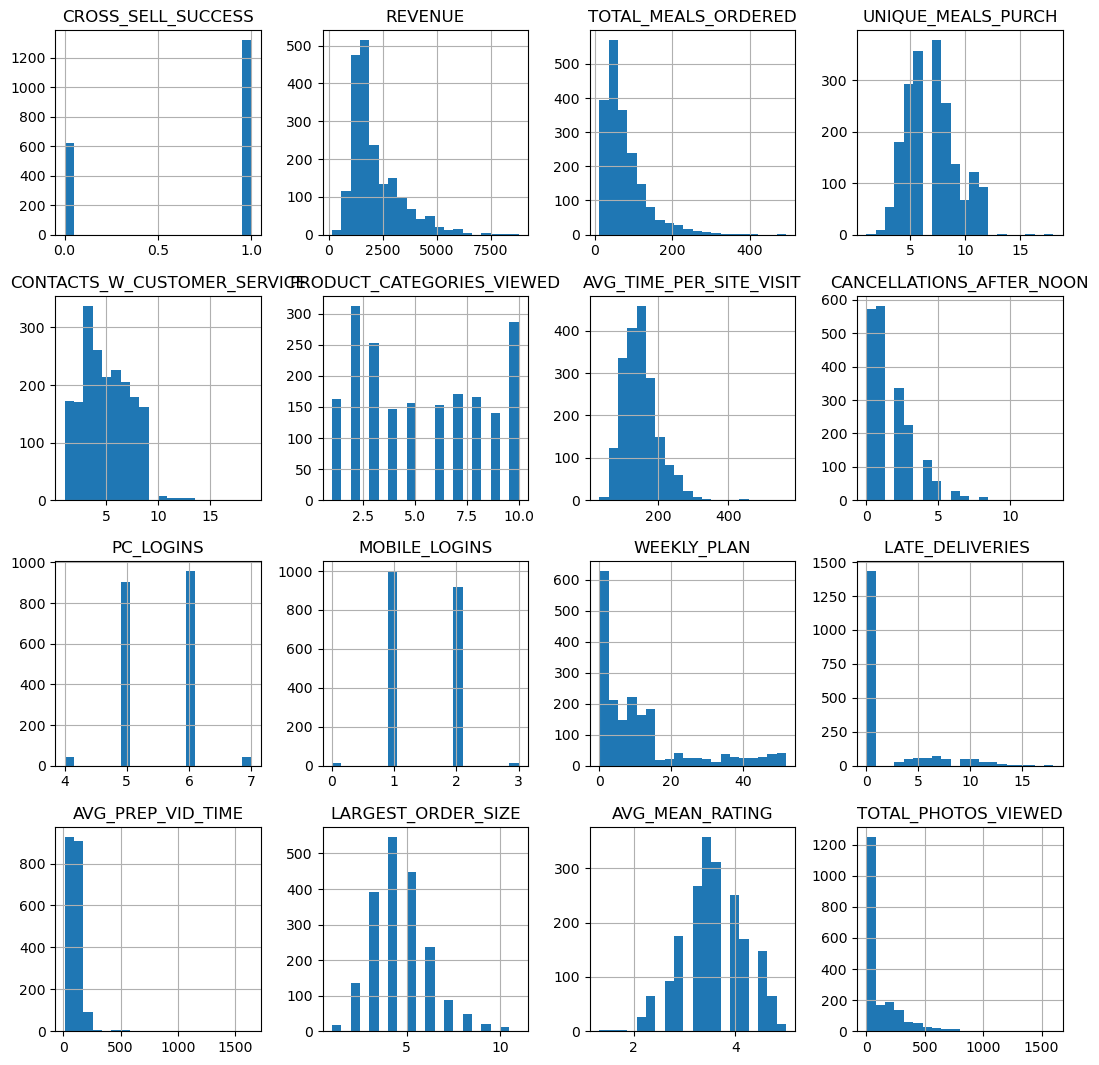

In [528]:
#using histogram to visulaize the numeric data to help identify 
#the continous and interval/count data. This also shows data that are normally distributed
cross_sell._get_numeric_data().hist(bins=20, figsize=(13, 13))

### Visuals Observed
The results above show the anomalies in the data set. Some variables are positively skewed, some are negatively skewed others are normally distributed.

In [529]:
#Grouping the data_type of each original variable in the dataset.

continuous_data = ['REVENUE'
                   'AVG_TIME_PER_SITE_VISIT',
                   'AVG_PREP_VID_TIME',
                   'AVG_MEAN_RATING']

counts_data =     ['UNIQUE_MEALS_PURCH',
                   'CONTACTS_W_CUSTOMER_SERVICE',
                   'PRODUCT_CATEGORIES_VIEWED',
                   'CANCELLATIONS_AFTER_NOON',
                   'MOBILE_LOGINS',
                   'PC_LOGINS',
                   'WEEKLY_PLAN',
                   'LATE_DELIVERIES',
                   'TOTAL_PHOTOS_VIEWED',
                   'LARGEST_ORDER_SIZE',
                   'TOTAL_MEALS_ORDERED']

categorical_data = ['CROSS_SELL_SUCCESS' #Y-variable (binary)
                    'EMAIL']

In [530]:
#checking the skewness for the variables
cross_sell.skew().round(decimals = 2)

/var/folders/ts/0xplq4j92sx9kyw_rb5rvxq40000gn/T/ipykernel_32174/1431843507.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cross_sell.skew().round(decimals = 2)


CROSS_SELL_SUCCESS            -0.77
REVENUE                        1.63
TOTAL_MEALS_ORDERED            2.01
UNIQUE_MEALS_PURCH             0.57
CONTACTS_W_CUSTOMER_SERVICE    0.37
PRODUCT_CATEGORIES_VIEWED      0.16
AVG_TIME_PER_SITE_VISIT        1.20
CANCELLATIONS_AFTER_NOON       1.44
PC_LOGINS                     -0.04
MOBILE_LOGINS                  0.05
WEEKLY_PLAN                    1.54
LATE_DELIVERIES                1.71
AVG_PREP_VID_TIME              9.64
LARGEST_ORDER_SIZE             0.70
AVG_MEAN_RATING               -0.11
TOTAL_PHOTOS_VIEWED            2.60
dtype: float64

### Skewness
The result above show there are features that the skewness is above 1. Log transforming features that have skewness above 1 can improve the skewness as well as feature engineering some data.

In [531]:
# creating a (Pearson) correlation matrix
df_corr = cross_sell.corr(method = 'pearson').round(decimals = 2)

df_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = False)

CROSS_SELL_SUCCESS             1.00
CANCELLATIONS_AFTER_NOON       0.14
MOBILE_LOGINS                  0.06
UNIQUE_MEALS_PURCH             0.04
PC_LOGINS                      0.04
AVG_TIME_PER_SITE_VISIT        0.03
LATE_DELIVERIES                0.02
LARGEST_ORDER_SIZE             0.02
TOTAL_MEALS_ORDERED            0.01
AVG_PREP_VID_TIME              0.01
TOTAL_PHOTOS_VIEWED            0.01
REVENUE                        0.00
CONTACTS_W_CUSTOMER_SERVICE   -0.00
PRODUCT_CATEGORIES_VIEWED      0.00
WEEKLY_PLAN                   -0.01
AVG_MEAN_RATING               -0.04
Name: CROSS_SELL_SUCCESS, dtype: float64

### Correlation
The results above shows weak correlation between the X-variables and the Y- Variable.

### Feature Engineering

In [532]:
#Using subsetting to check the value counts for all variables that appear to have a large amount of zeros.
# counting the number of zeroes for 
rev_zeroes         = len(cross_sell['REVENUE'][cross_sell["REVENUE"] == 0]) # REVENUE
tot_mls_ord_zeroes = len(cross_sell['TOTAL_MEALS_ORDERED'][cross_sell["TOTAL_MEALS_ORDERED"] == 0]) # TOTAL_MEALS_ORDERED 
purch_zeroes       = len(cross_sell['UNIQUE_MEALS_PURCH'][cross_sell["UNIQUE_MEALS_PURCH"] == 0]) # UNIQUE_MEALS_PURCH 
custservc_zeroes   = len(cross_sell['CONTACTS_W_CUSTOMER_SERVICE'][cross_sell["CONTACTS_W_CUSTOMER_SERVICE"] == 0]) # CONTACTS_W_CUSTOMER_SERVICE 
pd_cat_zeroes      = len(cross_sell['PRODUCT_CATEGORIES_VIEWED'][cross_sell["PRODUCT_CATEGORIES_VIEWED"] == 0]) # PRODUCT_CATEGORIES_VIEWED
site_zeroes        = len(cross_sell['AVG_TIME_PER_SITE_VISIT'][cross_sell["AVG_TIME_PER_SITE_VISIT"] == 0]) # AVG_TIME_PER_SITE_VISIT
cancel_zeroes      = len(cross_sell['CANCELLATIONS_AFTER_NOON'][cross_sell["CANCELLATIONS_AFTER_NOON"] == 0]) # CANCELLATIONS_AFTER_NOON
pc_login_zeroes    = len(cross_sell['PC_LOGINS'][cross_sell["PC_LOGINS"] == 0]) # PC_LOGINS 
mb_login_zeroes    = len(cross_sell['MOBILE_LOGINS'][cross_sell["MOBILE_LOGINS"] == 0]) # MOBILE_LOGINS
plan_zeroes        = len(cross_sell['WEEKLY_PLAN'][cross_sell["WEEKLY_PLAN"] == 0]) # WEEKLY_PLAN
late_dv_zeroes     = len(cross_sell['LATE_DELIVERIES '][cross_sell["LATE_DELIVERIES "] == 0]) # LATE_DELIVERIES
vid_tim_zeroes     = len(cross_sell['AVG_PREP_VID_TIME'][cross_sell["AVG_PREP_VID_TIME"] == 0]) # AVG_PREP_VID_TIME
order_zeroes       = len(cross_sell['LARGEST_ORDER_SIZE'][cross_sell["LARGEST_ORDER_SIZE"] == 0]) # LARGEST_ORDER_SIZE 
rating_zeroes      = len(cross_sell['AVG_MEAN_RATING'][cross_sell["AVG_MEAN_RATING"] == 0]) # AVG_MEAN_RATING
photo_zeroes       = len(cross_sell['TOTAL_PHOTOS_VIEWED'][cross_sell["TOTAL_PHOTOS_VIEWED"] == 0]) # AVG_MEAN_RATING




# printing a table of the results
print(f"""
                 No\t\tYes
               ---------------------
REVENUE              | {rev_zeroes}\t\t{len(cross_sell) - rev_zeroes}
TOTAL_MEALS_ORDERED  | {tot_mls_ord_zeroes}\t\t{len(cross_sell) - tot_mls_ord_zeroes}
UNIQUE_MEALS_PURCH   | {purch_zeroes}\t\t{len(cross_sell) - purch_zeroes}
CUSTOMER_SERVICE     | {custservc_zeroes}\t\t{len(cross_sell) - custservc_zeroes}
PRODUCT_CATEGORIE    | {pd_cat_zeroes}\t\t{len(cross_sell) - pd_cat_zeroes}
TIME_PER_SITE_VISIT  | {site_zeroes}\t\t{len(cross_sell) - site_zeroes}
CANCELLATIONS_AN     | {cancel_zeroes}\t\t{len(cross_sell) - cancel_zeroes}
PC_LOGINS            | {pc_login_zeroes}\t\t{len(cross_sell) - pc_login_zeroes}
MOBILE_LOGINS        | {mb_login_zeroes}\t\t{len(cross_sell) - mb_login_zeroes}
WEEKLY_PLAN          | {plan_zeroes}\t\t{len(cross_sell) - plan_zeroes}
LATE_DELIVERIES      | {late_dv_zeroes}\t\t{len(cross_sell) - late_dv_zeroes}
PREP_VID_TIME        | {vid_tim_zeroes}\t\t{len(cross_sell) - vid_tim_zeroes}
LARGEST_ORDER_SIZE   | {order_zeroes}\t\t{len(cross_sell) - order_zeroes}
MEAN_RATING          | {rating_zeroes}\t\t{len(cross_sell) - rating_zeroes}
PHOTOS_VIEWED        | {photo_zeroes}\t\t{len(cross_sell) - photo_zeroes} 
""")




                 No		Yes
               ---------------------
REVENUE              | 0		1946
TOTAL_MEALS_ORDERED  | 0		1946
UNIQUE_MEALS_PURCH   | 0		1946
CUSTOMER_SERVICE     | 0		1946
PRODUCT_CATEGORIE    | 0		1946
TIME_PER_SITE_VISIT  | 0		1946
CANCELLATIONS_AN     | 572		1374
PC_LOGINS            | 0		1946
MOBILE_LOGINS        | 16		1930
WEEKLY_PLAN          | 468		1478
LATE_DELIVERIES      | 1433		513
PREP_VID_TIME        | 0		1946
LARGEST_ORDER_SIZE   | 0		1946
MEAN_RATING          | 0		1946
PHOTOS_VIEWED        | 0		1946 



### Data with large amount of zeros
The table above shows that there are 4  columns with large amount of zeros.
1. CANCELLATIONS_AFTER_NOON
2. WEEKLY_PLAN
3. LATE_DELIVERIES 
4. MOBILE_LOGINS.

Zeros will affect the model. 
Engineering flag features for all variables that have at least 100 observations in both the 'yes' and 'no' columns. 

In [533]:
#Engineering flag features for all variables that have at least 100 observations in both the 'yes' and 'no' columns.
# placeholder variables
cross_sell['has_CANCELLATIONS_AFTER_NOON'] = 0
cross_sell['has_WEEKLY_PLAN']              = 0
cross_sell['has_LATE_DELIVERIES']         = 0


# iterating over each original column to
# change values in the new feature columns
for index, value in cross_sell.iterrows():


    # CANCELLATIONS_AFTER_NOON
    if cross_sell.loc[index, 'CANCELLATIONS_AFTER_NOON'] > 0:
        cross_sell.loc[index, 'has_CANCELLATIONS_AFTER_NOON'] = 1
        
        
    # WEEKLY_PLAN
    if cross_sell.loc[index, 'WEEKLY_PLAN'] > 0:
        cross_sell.loc[index, 'has_WEEKLY_PLAN'] = 1
        
        
    # LATE_DELIVERIES 
    if cross_sell.loc[index, 'LATE_DELIVERIES '] > 0:
        cross_sell.loc[index, 'has_LATE_DELIVERIES'] = 1
        

In [534]:
#Checking results
cross_sell[  ['has_CANCELLATIONS_AFTER_NOON', 'has_WEEKLY_PLAN', 'has_LATE_DELIVERIES']  ].head(n = 5)

,has_CANCELLATIONS_AFTER_NOON,has_WEEKLY_PLAN,has_LATE_DELIVERIES
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,1,0


In [535]:
#ratio of unique meals per order
cross_sell['UNIQUE_MEALS_PER_ORDER'] = cross_sell['UNIQUE_MEALS_PURCH'] / cross_sell['TOTAL_MEALS_ORDERED']


In [536]:
# checking results
cross_sell.loc[0:10,['UNIQUE_MEALS_PER_ORDER']]

,UNIQUE_MEALS_PER_ORDER
0,0.018256
1,0.024931
2,0.021583
3,0.029740
4,0.025362
5,0.028455
6,0.031646
7,0.039841
8,0.027344
9,0.026936


Assumption: This ratio provides insights into the preferences of customers and the popularity of different menu items.
"unique_meal/total_order" can help businesses understand the variety of customer preferences and identify opportunities to introduce new menu items or adjust pricing to promote more diverse ordering behavior.

In [537]:
#ratio of unique meals per order
cross_sell['CONTACT_W_CS_PER_ORDER'] = cross_sell ['TOTAL_MEALS_ORDERED'] / cross_sell['CONTACTS_W_CUSTOMER_SERVICE']



Assumption:  This ratio can be used to assess the effectiveness of customer service, as a higher ratio indicates that customers are able to place orders without needing to contact customer service for assistance.

In [538]:
# checking results
cross_sell.loc[0:10,['CONTACT_W_CS_PER_ORDER']]

,CONTACT_W_CS_PER_ORDER
0,493.0
1,361.0
2,278.0
3,269.0
4,276.0
5,246.0
6,316.0
7,251.0
8,256.0
9,297.0


In [539]:
#ratio of largest order size per order
cross_sell['LARGEEST_ORDER_SIZE_PER_ORDER'] = cross_sell['LARGEST_ORDER_SIZE'] / cross_sell['TOTAL_MEALS_ORDERED']




In [540]:
# checking results
cross_sell.loc[0:5,['LARGEEST_ORDER_SIZE_PER_ORDER']]

,LARGEEST_ORDER_SIZE_PER_ORDER
0,0.012170
1,0.013850
2,0.010791
3,0.022305
4,0.010870
5,0.032520


Assumption: This ratio can be used to measure the proportion of revenue generated by large orders, and can be useful in determining the overall purchasing behavior of customers. 

In [541]:
#TOTAL LOGINS
cross_sell['TOTAL_LOGINS'] = cross_sell['MOBILE_LOGINS'] + cross_sell['PC_LOGINS']

In [542]:
# checking results
cross_sell.loc[0:5,['TOTAL_LOGINS']]

,TOTAL_LOGINS
0,7
1,6
2,7
3,7
4,7
5,6


Assumption: This feature can provide useful information about customer engagement and activity. A high number of logins could indicate that customers are actively using the platform and are more likely to engage with cross-selling efforts.

In [543]:
#ratio of photo categories viewed to total photos viewed
cross_sell['PRODUCT_CAT_VIEWED_PER_PHOTO_VIEW'] = cross_sell['PRODUCT_CATEGORIES_VIEWED'] / cross_sell['TOTAL_PHOTOS_VIEWED']


In [544]:
# checking results
cross_sell.loc[0:5,['PRODUCT_CAT_VIEWED_PER_PHOTO_VIEW']]

,PRODUCT_CAT_VIEWED_PER_PHOTO_VIEW
0,0.021930
1,0.008824
2,0.027586
3,0.004785
4,0.057471
5,0.125000


Assumption: This ratio can provide insights into the shopping behavior of a customer by revealing the proportion of time spent viewing product photos versus other types of photos, as well as the specific product categories that are of interest to the customer.


In [545]:
#Revenue per meal ordered
cross_sell['REVENUE_PER_ORDER'] = cross_sell['REVENUE'] / cross_sell['TOTAL_MEALS_ORDERED']

        

In [546]:
# checking results
cross_sell.loc[0:5,['REVENUE_PER_ORDER']]

,REVENUE_PER_ORDER
0,9.979716
1,17.036011
2,12.356115
3,12.379182
4,12.418478
5,11.859756


 Assumption: This ratio can be useful in identifying trends in customer spending behavior over time. A high ratio  suggests that customers are spending more per order.
It can help businesses optimize their pricing strategies to improve profitability and customer satisfaction.

In [547]:
#revenue/pc logins
cross_sell['REVENUE_PER_PC_LOGINS'] = cross_sell ['REVENUE']/ cross_sell ['PC_LOGINS']


In [548]:
# checking results
cross_sell.loc[0:5,['REVENUE_PER_PC_LOGINS']]

,REVENUE_PER_PC_LOGINS
0,984.00
1,1230.00
2,572.50
3,666.00
4,571.25
5,583.50


Assumption: This ratio can be useful in understanding the revenue generated from PC users. This ratio can be a useful metric for businesses to assess the effectiveness of their  PC strategy and identify areas for improvement. 
By optimizing the desktop and mobile experience and increasing engagement among PC and mobile users, businesses can increase revenue and improve the overall customer experience.


In [549]:
#Copying LATE_DELIVERIES to a new column to get rid of the space
cross_sell['late_deliveries'] = cross_sell['LATE_DELIVERIES ']

In [550]:
# checking results
cross_sell.loc[0:10,['late_deliveries']]

,late_deliveries
0,0
1,0
2,0
3,0
4,0
5,0
6,4
7,0
8,0
9,0


In [551]:
#Logarithmically transforming the continous data 
# log transforming features and saving it to the dataset 

cross_sell['log_REVENUE'] = np.log(cross_sell['REVENUE']) 

 #AVG_TIME_PER_SITE_VISIT
cross_sell['log_AVG_TIME_PER_SITE_VISIT'] = np.log(cross_sell['AVG_TIME_PER_SITE_VISIT'])

#AVG_PREP_VID_TIME
cross_sell['log_AVG_PREP_VID_TIME'] = np.log(cross_sell['AVG_PREP_VID_TIME'])

#AVG_MEAN_RATING
cross_sell['log_AVG_MEAN_RATING'] = np.log(cross_sell['AVG_MEAN_RATING'])

#LARGEST_ORDER_SIZE
cross_sell['log_LARGEST_ORDER_SIZE'] = np.log(cross_sell['LARGEST_ORDER_SIZE'])

#TOTAL_MEALS_ORDERED
cross_sell['log_TOTAL_MEALS_ORDERED'] = np.log(cross_sell['TOTAL_MEALS_ORDERED'])

Assumption: Log transforming data can normalize the dataset and improve skewness

In [552]:
#Average time spent on the site per order
cross_sell['TIME_ON_SITE_PER_ORDER'] = cross_sell['AVG_TIME_PER_SITE_VISIT']/cross_sell['TOTAL_MEALS_ORDERED']

Assumption: This metrics can identify customers who spend more time on the site per order. These customers may be more engaged with the brand and could potentially be more receptive to cross-selling offers.

In [553]:
#Mean rating per order
cross_sell['MEAN_RATING_PER_ORDER'] = cross_sell['AVG_MEAN_RATING']/cross_sell['TOTAL_MEALS_ORDERED']

Assumption: Customers who rate their meals highly may be more open to trying new items or purchasing additional products from the brand.

In [554]:
# Printing EMAIL count to see if it is large enough to affect our data
# printing columns
print(f"""
EMAIL
-------------
{cross_sell['EMAIL'].value_counts().sum()}
""")


EMAIL
-------------
1946



In [555]:
#Spliting emails into 3 categories (junk, personal and professional)
# STEP 1: splitting emails
# placeholder list
email_lst = []

# looping over each email address
for index, col in cross_sell.iterrows():
    
    # splitting email domain at '@'
    split_email = cross_sell.loc[index, 'EMAIL'].split(sep = "@")
    
    # appending placeholder_lst with the results
    email_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(email_lst)

# safety measure in case of multiple concatenations
cross_sell['EMAIL_DOMAINS'] = email_df[1]


In [556]:
# STEP 2: concatenating with original DataFrame

#instantiating lists of email domains for professional, junk and personal

professional = ['mmm.com', 'amex.com', 'apple.com', 'boeing.com', 'caterpillar.com',
                'chevron.com', 'cisco.com', 'cocacola.com', 'disney.com', 'dupont.com',
                'exxon.com', 'ge.org','goldmansacs.com', 'homedepot.com', 'ibm.com',
                'intel.com','jnj.com', 'jpmorgan.com', 'mcdonalds.com', 'merck.com',
                'microsoft.com', 'nike.com', 'pfizer.com', 'pg.com', 'travelers.com',
                'unitedtech.com', 'unitedhealth.com', 'verizon.com', 'visa.com','walmart.com']

personal =['gmail.com', 'yahoo.com', 'protonmail.com']

junk = ['me.com','aol.com', 'hotmail.com', 'live.com', 'msn.com' , 'passport.com']

#place holder to specify the domains
email_groups = []

#creating for loop to separate the emails into company, individual and spam
for domain in cross_sell['EMAIL_DOMAINS']:
    
    if   domain in professional:
        email_groups.append('professional')
        
    elif domain in personal:
        email_groups.append('personal')
        
    elif domain in junk:
        email_groups.append('junk')
    
    else:
        print('not_mail')
        



In [557]:
#converting the list to dataframe
email_groups_df = pd.DataFrame(email_groups)

#creating a new column email_class in the dataset

cross_sell['EMAIL_CLASS'] = email_groups_df[0]


In [558]:
# one hot encoding categorical variables
one_hot_email = pd.get_dummies(cross_sell['EMAIL_CLASS'])

# dropping categorical variables after they've been encoded
cross_sell = cross_sell.drop('EMAIL_CLASS', axis = 1)
cross_sell = cross_sell.drop('EMAIL_DOMAINS', axis = 1)
cross_sell = cross_sell.drop('EMAIL', axis = 1)
# joining codes together
cross_sell = cross_sell.join([one_hot_email])

In [559]:
# checking results
cross_sell.head(n=5)

,CROSS_SELL_SUCCESS,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED,has_CANCELLATIONS_AFTER_NOON,has_WEEKLY_PLAN,has_LATE_DELIVERIES,UNIQUE_MEALS_PER_ORDER,CONTACT_W_CS_PER_ORDER,LARGEEST_ORDER_SIZE_PER_ORDER,TOTAL_LOGINS,PRODUCT_CAT_VIEWED_PER_PHOTO_VIEW,REVENUE_PER_ORDER,REVENUE_PER_PC_LOGINS,late_deliveries,log_REVENUE,log_AVG_TIME_PER_SITE_VISIT,log_AVG_PREP_VID_TIME,log_AVG_MEAN_RATING,log_LARGEST_ORDER_SIZE,log_TOTAL_MEALS_ORDERED,TIME_ON_SITE_PER_ORDER,MEAN_RATING_PER_ORDER,junk,personal,professional
0,1,4920.0,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456,1,0,0,0.018256,493.0,0.012170,7,0.021930,9.979716,984.00,0,8.501064,5.581991,4.922969,1.062894,1.791759,6.200509,0.538742,0.005872,0,1,0
1,0,6150.0,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680,1,0,0,0.024931,361.0,0.013850,6,0.008824,17.036011,1230.00,0,8.724207,5.509388,4.789157,0.967584,1.609438,5.888878,0.684211,0.007290,0,0,1
2,0,3435.0,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145,0,1,0,0.021583,278.0,0.010791,7,0.027586,12.356115,572.50,0,8.141772,5.102302,4.844187,1.304056,1.098612,5.627621,0.591367,0.013253,0,1,0
3,1,3330.0,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418,1,0,0,0.029740,269.0,0.022305,7,0.004785,12.379182,666.00,0,8.110728,5.170484,4.865841,1.149906,1.791759,5.594711,0.654275,0.011739,0,1,0
4,1,3427.5,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174,0,1,0,0.025362,276.0,0.010870,7,0.057471,12.418478,571.25,0,8.139586,5.103518,3.538638,1.149906,1.098612,5.620401,0.596377,0.011442,0,0,1


In [560]:
#TOTAL EMAILS
cross_sell['TOTAL_EMAILS'] = cross_sell['personal'] + cross_sell['professional']


Assumptions: Customers who have provided their personal or email addresses may be more interested in receiving promotions or updates from the brand, and may be more receptive to cross-selling offers.

In [561]:
# checking results
cross_sell.loc[0:100,['TOTAL_EMAILS']]

,TOTAL_EMAILS
0,1
1,1
2,1
3,1
4,1
5,1
6,0
7,0
8,0
9,1


In [562]:
#correlation between X and y variable
df_corr = cross_sell.corr().round(2)
df_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = True)

junk                                -0.28
AVG_MEAN_RATING                     -0.04
MEAN_RATING_PER_ORDER               -0.03
log_AVG_MEAN_RATING                 -0.03
has_WEEKLY_PLAN                     -0.02
REVENUE_PER_ORDER                   -0.02
LARGEEST_ORDER_SIZE_PER_ORDER       -0.01
WEEKLY_PLAN                         -0.01
UNIQUE_MEALS_PER_ORDER              -0.01
TIME_ON_SITE_PER_ORDER              -0.01
PRODUCT_CATEGORIES_VIEWED            0.00
CONTACTS_W_CUSTOMER_SERVICE         -0.00
CONTACT_W_CS_PER_ORDER               0.00
REVENUE                              0.00
REVENUE_PER_PC_LOGINS               -0.00
PRODUCT_CAT_VIEWED_PER_PHOTO_VIEW    0.01
log_REVENUE                          0.01
has_LATE_DELIVERIES                  0.01
TOTAL_PHOTOS_VIEWED                  0.01
TOTAL_MEALS_ORDERED                  0.01
AVG_PREP_VID_TIME                    0.01
LARGEST_ORDER_SIZE                   0.02
LATE_DELIVERIES                      0.02
log_TOTAL_MEALS_ORDERED           

### Observation
Junk email has a negative correlation to CROSS_SELL. junk email are emails that customers do not open. Sending a marketing notification to junk emails just means the customers will never get to see it. We need to find a different way of marketing the new product maybe through website.
However, professional email has a positive correlation of 0.19 which means customers with professional emails are mostly likely to see the email with the new marketed product. 

In [563]:
#Preparing Explanatory and Response Data
# declaring explanatory variables
cross_sell_data   = cross_sell.drop('CROSS_SELL_SUCCESS', axis = 1) #dropping y variable from the x side


# declaring response variable
cross_sell_target = cross_sell[ 'CROSS_SELL_SUCCESS' ] #y_variable

In [564]:
# Preparing train-test split for statsmodels
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            cross_sell_data,   # x_data
            cross_sell_target, # y_data
            test_size    = 0.25,
            random_state = 219,
            stratify     = cross_sell_target) # preserving balance


# merging training data for statsmodels
cross_sell_train = pd.concat([x_train, y_train], axis = 1)

In [565]:
#printing to see the proportion of the training and testing set
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")




Response Variable Proportions (Training Set)
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64



In [566]:
#Using a for loop to print X-variables for easy copying
for var in cross_sell_data:
    print(f" {var} + ")

 REVENUE + 
 TOTAL_MEALS_ORDERED + 
 UNIQUE_MEALS_PURCH + 
 CONTACTS_W_CUSTOMER_SERVICE + 
 PRODUCT_CATEGORIES_VIEWED + 
 AVG_TIME_PER_SITE_VISIT + 
 CANCELLATIONS_AFTER_NOON + 
 PC_LOGINS + 
 MOBILE_LOGINS + 
 WEEKLY_PLAN + 
 LATE_DELIVERIES  + 
 AVG_PREP_VID_TIME + 
 LARGEST_ORDER_SIZE + 
 AVG_MEAN_RATING + 
 TOTAL_PHOTOS_VIEWED + 
 has_CANCELLATIONS_AFTER_NOON + 
 has_WEEKLY_PLAN + 
 has_LATE_DELIVERIES + 
 UNIQUE_MEALS_PER_ORDER + 
 CONTACT_W_CS_PER_ORDER + 
 LARGEEST_ORDER_SIZE_PER_ORDER + 
 TOTAL_LOGINS + 
 PRODUCT_CAT_VIEWED_PER_PHOTO_VIEW + 
 REVENUE_PER_ORDER + 
 REVENUE_PER_PC_LOGINS + 
 late_deliveries + 
 log_REVENUE + 
 log_AVG_TIME_PER_SITE_VISIT + 
 log_AVG_PREP_VID_TIME + 
 log_AVG_MEAN_RATING + 
 log_LARGEST_ORDER_SIZE + 
 log_TOTAL_MEALS_ORDERED + 
 TIME_ON_SITE_PER_ORDER + 
 MEAN_RATING_PER_ORDER + 
 junk + 
 personal + 
 professional + 
 TOTAL_EMAILS + 


# Building Models

## Logistic Regression (Statsmodel)

### Base Model

In [567]:
#Building a base logistic regression model in statsmodels using original X variables

# instantiating a logistic regression model object
logistic_base = smf.logit(formula = """ CROSS_SELL_SUCCESS ~     REVENUE + 
                                                                 TOTAL_MEALS_ORDERED + 
                                                                 UNIQUE_MEALS_PURCH + 
                                                                 CONTACTS_W_CUSTOMER_SERVICE + 
                                                                 PRODUCT_CATEGORIES_VIEWED + 
                                                                 AVG_TIME_PER_SITE_VISIT + 
                                                                 CANCELLATIONS_AFTER_NOON + 
                                                                 PC_LOGINS + 
                                                                 MOBILE_LOGINS + 
                                                                 WEEKLY_PLAN +  
                                                                 AVG_PREP_VID_TIME + 
                                                                 LARGEST_ORDER_SIZE + 
                                                                 AVG_MEAN_RATING + 
                                                                 TOTAL_PHOTOS_VIEWED + 
                                                                 late_deliveries 
                                                                        """,
                                        data    = cross_sell_train)


# fitting the model object
results_base = logistic_base.fit()


# checking the results SUMMARY
results_base.summary2()

Optimization terminated successfully.
         Current function value: 0.608970
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit                Pseudo R-squared:   0.030     
Dependent Variable:    CROSS_SELL_SUCCESS   AIC:                1808.9752 
Date:                  2023-03-03 23:33     BIC:                1893.5433 
No. Observations:      1459                 Log-Likelihood:     -888.49   
Df Model:              15                   LL-Null:            -916.19   
Df Residuals:          1443                 LLR p-value:        1.5227e-06
Converged:             1.0000               Scale:              1.0000    
No. Iterations:        5.0000                                             
--------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
--------------------------------------------------------------------------
Intercept                   -1.3204   0.8373 -1.5770 0.1148 -2.9614 0.3206
REVENUE                     -0.0001   0.0001 -1.7720 0.0764 -0.0003 0.0000
TOTAL_MEALS_ORDERED          0.0013   0.0014  0.9161 0.3596 -0.0014 0.0040
UNIQUE_MEALS_PURCH           0.0508   0.0254  1.9969 0.0458  0.0009 0.1006
CONTACTS_W_CUSTOMER_SERVICE  0.0266   0.0247  1.0767 0.2816 -0.0218 0.0751
PRODUCT_CATEGORIES_VIEWED   -0.0025   0.0189 -0.1313 0.8956 -0.0396 0.0346
AVG_TIME_PER_SITE_VISIT      0.0048   0.0025  1.9132 0.0557 -0.0001 0.0097
CANCELLATIONS_AFTER_NOON     0.1980   0.0395  5.0071 0.0000  0.1205 0.2755
PC_LOGINS                    0.1826   0.0988  1.8479 0.0646 -0.0111 0.3764
MOBILE_LOGINS                0.3457   0.1108  3.1207 0.0018  0.1286 0.5629
WEEKLY_PLAN                 -0.0028   0.0042 -0.6798 0.4966 -0.0110 0.0053
AVG_PREP_VID_TIME           -0.0011   0.0011 -0.9380 0.3482 -0.0033 0.0012
LARGEST_ORDER_SIZE          -0.0596   0.0650 -0.9161 0.3596 -0.1870 0.0679
AVG_MEAN_RATING             -0.0906   0.1152 -0.7870 0.4313 -0.3164 0.1351
TOTAL_PHOTOS_VIEWED         -0.0000   0.0004 -0.0108 0.9914 -0.0008 0.0008
late_deliveries              0.0110   0.0154  0.7177 0.4729 -0.0191 0.0412
==========================================================================

"""

#### Observation
Significant Variables
1. UNIQUE_MEALS_PURCH	
2. CANCELLATIONS_AFTER_NOON
3. MOBILE_LOGINS


### Full Model

In [568]:
#Building a logistic regression model in statsmodels using all of the explanatory variables (without junk and total emails)

# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ CROSS_SELL_SUCCESS ~ REVENUE + 
                                                             TOTAL_MEALS_ORDERED + 
                                                             UNIQUE_MEALS_PURCH + 
                                                             CONTACTS_W_CUSTOMER_SERVICE + 
                                                             PRODUCT_CATEGORIES_VIEWED + 
                                                             AVG_TIME_PER_SITE_VISIT + 
                                                             CANCELLATIONS_AFTER_NOON + 
                                                             PC_LOGINS + 
                                                             MOBILE_LOGINS + 
                                                             WEEKLY_PLAN + 
                                                             AVG_PREP_VID_TIME + 
                                                             LARGEST_ORDER_SIZE + 
                                                             AVG_MEAN_RATING + 
                                                             TOTAL_PHOTOS_VIEWED + 
                                                             has_CANCELLATIONS_AFTER_NOON + 
                                                             has_WEEKLY_PLAN + 
                                                             has_LATE_DELIVERIES + 
                                                             UNIQUE_MEALS_PER_ORDER + 
                                                             CONTACT_W_CS_PER_ORDER + 
                                                             LARGEEST_ORDER_SIZE_PER_ORDER + 
                                                             TOTAL_LOGINS + 
                                                             PRODUCT_CAT_VIEWED_PER_PHOTO_VIEW + 
                                                             REVENUE_PER_ORDER + 
                                                             REVENUE_PER_PC_LOGINS + 
                                                             late_deliveries + 
                                                             log_REVENUE + 
                                                             log_AVG_TIME_PER_SITE_VISIT + 
                                                             log_AVG_PREP_VID_TIME + 
                                                             log_AVG_MEAN_RATING + 
                                                             log_LARGEST_ORDER_SIZE + 
                                                             log_TOTAL_MEALS_ORDERED + 
                                                             TIME_ON_SITE_PER_ORDER + 
                                                             MEAN_RATING_PER_ORDER + 
                                                             personal + 
                                                             professional  
                                                                   """,
                          
                                        data    = cross_sell_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.559296
         Iterations 12


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                        Results: Logit
===============================================================================================
Model:                        Logit                       Pseudo R-squared:          0.109     
Dependent Variable:           CROSS_SELL_SUCCESS          AIC:                       1702.0259 
Date:                         2023-03-03 23:33            BIC:                       1887.0187 
No. Observations:             1459                        Log-Likelihood:            -816.01   
Df Model:                     34                          LL-Null:                   -916.19   
Df Residuals:                 1424                        LLR p-value:               1.8142e-25
Converged:                    1.0000                      Scale:                     1.0000    
No. Iterations:               12.0000                                                          
-----------------------------------------------------------------------------------------------
                                   Coef.    Std.Err.     z    P>|z|      [0.025       0.975]   
-----------------------------------------------------------------------------------------------
Intercept                          3.9671      6.2452  0.6352 0.5253       -8.2734      16.2075
REVENUE                           -0.0002      0.0005 -0.3095 0.7569       -0.0012       0.0009
TOTAL_MEALS_ORDERED               -0.0140      0.0048 -2.9147 0.0036       -0.0233      -0.0046
UNIQUE_MEALS_PURCH                 0.1310      0.0644  2.0321 0.0421        0.0046       0.2573
CONTACTS_W_CUSTOMER_SERVICE        0.0424      0.0328  1.2942 0.1956       -0.0218       0.1067
PRODUCT_CATEGORIES_VIEWED         -0.0028      0.0218 -0.1280 0.8981       -0.0456       0.0400
AVG_TIME_PER_SITE_VISIT            0.0177      0.0082  2.1605 0.0307        0.0016       0.0338
CANCELLATIONS_AFTER_NOON           0.2197      0.0562  3.9088 0.0001        0.1095       0.3299
PC_LOGINS                          0.0450 778139.7172  0.0000 1.0000 -1525125.7756 1525125.8656
MOBILE_LOGINS                      0.1518 778139.7172  0.0000 1.0000 -1525125.6688 1525125.9724
WEEKLY_PLAN                        0.0035      0.0051  0.6822 0.4951       -0.0065       0.0134
AVG_PREP_VID_TIME                 -0.0012      0.0024 -0.5052 0.6134       -0.0060       0.0036
LARGEST_ORDER_SIZE                -0.2914      0.1887 -1.5438 0.1226       -0.6613       0.0786
AVG_MEAN_RATING                   -0.7537      0.8791 -0.8573 0.3913       -2.4766       0.9693
TOTAL_PHOTOS_VIEWED                0.0002      0.0005  0.3266 0.7439       -0.0008       0.0011
has_CANCELLATIONS_AFTER_NOON      -0.0042      0.1742 -0.0239 0.9809       -0.3457       0.3373
has_WEEKLY_PLAN                   -0.1908      0.1615 -1.1809 0.2377       -0.5074       0.1259
has_LATE_DELIVERIES               -0.5824      0.3247 -1.7939 0.0728       -1.2188       0.0539
UNIQUE_MEALS_PER_ORDER            -0.7171      1.8008 -0.3982 0.6905       -4.2466       2.8124
CONTACT_W_CS_PER_ORDER             0.0033      0.0029  1.1263 0.2600       -0.0024       0.0090
LARGEEST_ORDER_SIZE_PER_ORDER     -1.4069      3.7477 -0.3754 0.7074       -8.7524       5.9385
TOTAL_LOGINS                       0.1968 778139.7172  0.0000 1.0000 -1525125.6238 1525126.0174
PRODUCT_CAT_VIEWED_PER_PHOTO_VIEW -0.0337      0.1100 -0.3065 0.7592       -0.2494       0.1819
REVENUE_PER_ORDER                  0.0122      0.0131  0.9265 0.3542       -0.0136       0.0379
REVENUE_PER_PC_LOGINS              0.0004      0.0027  0.1574 0.8749       -0.0048       0.0056
late_deliveries                    0.0767      0.0387  1.9800 0.0477        0.0008       0.1526
log_REVENUE                       -0.8331      0.8191 -1.0172 0.3091       -2.4385       0.7722
log_AVG_TIME_PER_SITE_VISIT       -2.4932      1.4134 -1.7639 0.0777       -5.2635       0.2771
log_AVG_PREP_VID_TIME              0.0416      0.2658  0

#### Observation
Significant Variables
1. UNIQUE_MEALS_PURCH	
2. CANCELLATIONS_AFTER_NOON
3. TOTAL_EMAILS
4. TOTAL_LOGINS
5. TOTAL_MEALS_ORDERED
6. AVG_TIME_PER_SITE_VISIT

However, MOBILE_LOGINS and PC_LOGINS have a 1.0 correlation and taking out one of them will have different effect on the p-values

### Fitted Model

In [569]:
#Building a logistic regression model in statsmodels using all of the explanatory variables 
#(without total emails and professional emails) that are significant at 0.05

# instantiating a logistic regression model object
logistic_fit_1 = smf.logit(formula = """ CROSS_SELL_SUCCESS ~  UNIQUE_MEALS_PURCH + 
                                                               CANCELLATIONS_AFTER_NOON + 
                                                               TOTAL_LOGINS + 
                                                               log_TOTAL_MEALS_ORDERED + 
                                                               junk +  
                                                               professional  
                                               

                                                                """,
                                        data    = cross_sell_train)


# fitting the model object
results_fit = logistic_fit_1.fit()


# checking the results SUMMARY
results_fit.summary2()

Optimization terminated successfully.
         Current function value: 0.569136
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                 Logit               Pseudo R-squared:  0.094     
Dependent Variable:    CROSS_SELL_SUCCESS  AIC:               1674.7387 
Date:                  2023-03-03 23:33    BIC:               1711.7373 
No. Observations:      1459                Log-Likelihood:    -830.37   
Df Model:              6                   LL-Null:           -916.19   
Df Residuals:          1452                LLR p-value:       2.0108e-34
Converged:             1.0000              Scale:             1.0000    
No. Iterations:        6.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Intercept                -2.5365   0.6960 -3.6443 0.0003 -3.9007 -1.1723
UNIQUE_MEALS_PURCH        0.0722   0.0273  2.6432 0.0082  0.0187  0.1257
CANCELLATIONS_AFTER_NOON  0.2161   0.0411  5.2559 0.0000  0.1355  0.2967
TOTAL_LOGINS              0.2715   0.0768  3.5335 0.0004  0.1209  0.4221
log_TOTAL_MEALS_ORDERED   0.1725   0.0871  1.9793 0.0478  0.0017  0.3433
junk                     -1.2483   0.1512 -8.2561 0.0000 -1.5446 -0.9519
professional              0.4783   0.1402  3.4115 0.0006  0.2035  0.7531
========================================================================

"""

In [570]:
#Building a logistic regression model in statsmodels using all of the explanatory variables 
#(without total emails and personal emails) that are significant at 0.15

# instantiating a logistic regression model object
logistic_fit_2 = smf.logit(formula = """ CROSS_SELL_SUCCESS ~ REVENUE + 
                                                              UNIQUE_MEALS_PURCH + 
                                                              AVG_TIME_PER_SITE_VISIT + 
                                                              CANCELLATIONS_AFTER_NOON + 
                                                              has_LATE_DELIVERIES + 
                                                              TOTAL_LOGINS + 
                                                              late_deliveries + 
                                                              log_TOTAL_MEALS_ORDERED + 
                                                              junk +
                                                              professional  
                                                                   """,
                          
                                        data    = cross_sell_train)


# fitting the model object
results_full = logistic_fit_2.fit()


# checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.566348
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                 Logit               Pseudo R-squared:  0.098     
Dependent Variable:    CROSS_SELL_SUCCESS  AIC:               1674.6027 
Date:                  2023-03-03 23:33    BIC:               1732.7433 
No. Observations:      1459                Log-Likelihood:    -826.30   
Df Model:              10                  LL-Null:           -916.19   
Df Residuals:          1448                LLR p-value:       2.5975e-33
Converged:             1.0000              Scale:             1.0000    
No. Iterations:        6.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Intercept                -3.0038   0.7506 -4.0021 0.0001 -4.4748 -1.5327
REVENUE                  -0.0002   0.0001 -2.0542 0.0400 -0.0003 -0.0000
UNIQUE_MEALS_PURCH        0.0866   0.0296  2.9236 0.0035  0.0285  0.1446
AVG_TIME_PER_SITE_VISIT   0.0028   0.0017  1.6656 0.0958 -0.0005  0.0062
CANCELLATIONS_AFTER_NOON  0.2202   0.0414  5.3233 0.0000  0.1391  0.3013
has_LATE_DELIVERIES      -0.5313   0.3182 -1.6699 0.0949 -1.1549  0.0923
TOTAL_LOGINS              0.2713   0.0774  3.5070 0.0005  0.1197  0.4229
late_deliveries           0.0710   0.0381  1.8624 0.0625 -0.0037  0.1457
log_TOTAL_MEALS_ORDERED   0.2463   0.1194  2.0624 0.0392  0.0122  0.4803
junk                     -1.2789   0.1525 -8.3860 0.0000 -1.5779 -0.9800
professional              0.4653   0.1407  3.3073 0.0009  0.1896  0.7411
========================================================================

"""

In [571]:
# explanatory sets from logistic regression results

# creating a dictionary to store candidate models

candidate_dict = {

 # base model
 'logistic_base'   : ['REVENUE', 
                     'TOTAL_MEALS_ORDERED',
                     'UNIQUE_MEALS_PURCH', 
                     'CONTACTS_W_CUSTOMER_SERVICE',
                     'PRODUCT_CATEGORIES_VIEWED',
                     'AVG_TIME_PER_SITE_VISIT',
                     'CANCELLATIONS_AFTER_NOON',
                     'PC_LOGINS',
                     'MOBILE_LOGINS',
                     'WEEKLY_PLAN',
                     'AVG_PREP_VID_TIME',
                     'LARGEST_ORDER_SIZE',
                     'AVG_MEAN_RATING',
                     'TOTAL_PHOTOS_VIEWED',
                     'late_deliveries' ],
 

 # full model (excluding junk)
 'logistic_full'    : [ 'REVENUE',
                        'TOTAL_MEALS_ORDERED',
                         'UNIQUE_MEALS_PURCH',
                         'CONTACTS_W_CUSTOMER_SERVICE',
                         'PRODUCT_CATEGORIES_VIEWED',
                         'AVG_TIME_PER_SITE_VISIT',
                         'CANCELLATIONS_AFTER_NOON',
                         'PC_LOGINS', 
                         'MOBILE_LOGINS',
                         'WEEKLY_PLAN',
                         'AVG_PREP_VID_TIME', 
                         'LARGEST_ORDER_SIZE',
                         'AVG_MEAN_RATING',
                         'TOTAL_PHOTOS_VIEWED',
                         'has_CANCELLATIONS_AFTER_NOON',
                         'has_WEEKLY_PLAN',
                         'has_LATE_DELIVERIES',
                         'UNIQUE_MEALS_PER_ORDER',
                         'CONTACT_W_CS_PER_ORDER',
                         'LARGEEST_ORDER_SIZE_PER_ORDER',
                         'TOTAL_LOGINS',
                         'PRODUCT_CAT_VIEWED_PER_PHOTO_VIEW',
                         'REVENUE_PER_ORDER',
                         'REVENUE_PER_PC_LOGINS',
                         'REVENUE_PER_MOBILE_LOGINS', 
                         'late_deliveries',
                         'personal',
                         'professional',
                         'TOTAL_EMAILS',
                         'log_REVENUE',
                         'log_AVG_TIME_PER_SITE_VISIT',
                         'log_AVG_PREP_VID_TIME',
                         'log_AVG_MEAN_RATING',
                         'log_LARGEST_ORDER_SIZE',
                         'log_TOTAL_MEALS_ORDERED', 
                         'TIME_ON_SITE_PER_ORDER', 
                         'MEAN_RATING_PER_ORDER'  ],
    
    
 # significant variables at 0.05
 'logistic_fit_1'  : ['UNIQUE_MEALS_PURCH',
                      'CANCELLATIONS_AFTER_NOON',
                     'TOTAL_LOGINS',
                     'log_TOTAL_MEALS_ORDERED',
                     'junk',
                     'professional'],
    
    
# significant variables at 0.15 
'logistic_fit_2' : ['REVENUE',
                    'UNIQUE_MEALS_PURCH',
                    'AVG_TIME_PER_SITE_VISIT',
                    'CANCELLATIONS_AFTER_NOON',
                    'has_LATE_DELIVERIES',
                    'TOTAL_LOGINS',
                    'late_deliveries',
                    'log_TOTAL_MEALS_ORDERED', 
                    'junk',
                    'professional'  ]



                 
                                                    


}

In [572]:
# printing candidate variable sets
print(f"""
/--------------------------\\
|Explanatory Variable Sets |
\\--------------------------/

Base Model:
-----------
{candidate_dict['logistic_base']}


Full Model:
--------------------------------
{candidate_dict['logistic_full']}


Fitted Model:
---------------------------------
{candidate_dict['logistic_fit_1']}


New Features:
---------------------------------
{candidate_dict['logistic_fit_2']}

""")


/--------------------------\
|Explanatory Variable Sets |
\--------------------------/

Base Model:
-----------
['REVENUE', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'CANCELLATIONS_AFTER_NOON', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'AVG_MEAN_RATING', 'TOTAL_PHOTOS_VIEWED', 'late_deliveries']


Full Model:
--------------------------------
['REVENUE', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'CANCELLATIONS_AFTER_NOON', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'AVG_MEAN_RATING', 'TOTAL_PHOTOS_VIEWED', 'has_CANCELLATIONS_AFTER_NOON', 'has_WEEKLY_PLAN', 'has_LATE_DELIVERIES', 'UNIQUE_MEALS_PER_ORDER', 'CONTACT_W_CS_PER_ORDER', 'LARGEEST_ORDER_SIZE_PER_ORDER', 'TOTAL_LOGINS', 'PRODUCT_CAT_VIEWED_PER_PHOTO_VIEW', 'REVE

## Logistic Regression (scikit-learn)

### Fitted model at 0.05 significant

In [573]:
# Preparing train-test split for scikit-learn using logistic_fit_1

cross_sell_data   =  cross_sell.loc[ : , candidate_dict['logistic_fit_1']]
cross_sell_target =  cross_sell.loc[ : , 'CROSS_SELL_SUCCESS']


# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            cross_sell_data, #x-variable
            cross_sell_target, # y-variable
            test_size    = 0.25,
            random_state = 219,
            stratify     = cross_sell_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit_1 = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred_fit_1 = logreg_fit_1.predict(x_test)

# Calculating the train-test gap
model_gap         = abs(logreg_train_score - logreg_test_score).round(4)


# Printing the results
print('Training ACCURACY:', logreg_fit_1.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit_1.score(x_test, y_test).round(4))
print('AUC Score', roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred_fit_1).round(decimals = 4))

print('Train-Test Gap :', model_gap)



# saving scoring data for future use
logreg_train_score = logreg_fit_1.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit_1.score(x_test, y_test).round(4) # accuracy

# saving AUC score and train-test gap for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred_fit_1).round(decimals = 4)

model_gap         = abs(logreg_train_score - logreg_test_score).round(4) #train-test gap

Training ACCURACY: 0.7183
Testing  ACCURACY: 0.7207
AUC Score 0.6166
Train-Test Gap : 0.0003


In [574]:
# unpacking the confusion matrix for logistic regression (0.05 significant)
logreg_fit_1_tn, \
logreg_fit_1_fp, \
logreg_fit_1_fn, \
logreg_fit_1_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred_fit_1).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_fit_1_tn}
False Positives: {logreg_fit_1_fp}
False Negatives: {logreg_fit_1_fn}
True Positives : {logreg_fit_1_tp}
""")


True Negatives : 51
False Positives: 105
False Negatives: 31
True Positives : 300



#### Observation
The results suggest that the model has moderate accuracy and has room for improvement in distinguishing between positive and negative cases.
AUC score of 0.62 indicates that the model performs better than random guessing

The confusion matrix indicates that the model has a high sensitivity (ability to identify positive cases) but a low specificity (ability to correctly identify negative cases). 

### Fitted model at 0.15 significant

In [575]:
# Preparing train-test split for scikit-learn using logistic_full

cross_sell_data   =  cross_sell.loc[ : , candidate_dict['logistic_fit_2']]
cross_sell_target =  cross_sell.loc[ : , 'CROSS_SELL_SUCCESS']


# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            cross_sell_data, #x-variable
            cross_sell_target, # y-variable
            test_size    = 0.25,
            random_state = 219,
            stratify     = cross_sell_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit_2 = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred_fit_2 = logreg_fit_2.predict(x_test)

# Calculating the train-test gap
model_gap         = abs(logreg_train_score - logreg_test_score).round(4)



# Printing the results
print('Training ACCURACY:', logreg_fit_2.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit_2.score(x_test, y_test).round(4))
print('AUC Score', roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred_fit_2).round(decimals = 4))

print('Train-Test Gap :', model_gap)


# saving scoring data for future use
logreg_train_score = logreg_fit_2.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit_2.score(x_test, y_test).round(4) # accuracy

# saving AUC score and train-test for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred_fit_2).round(decimals = 4)
model_gap         = abs(logreg_train_score - logreg_test_score).round(4) #train-test gap

Training ACCURACY: 0.721
Testing  ACCURACY: 0.7207
AUC Score 0.6099
Train-Test Gap : 0.0024


/Users/tolulopeolokesusi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [576]:
# unpacking the confusion matrix for logistic regression (0.15 significant)
logreg_fit_2_tn, \
logreg_fit_2_fp, \
logreg_fit_2_fn, \
logreg_fit_2_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred_fit_2).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_fit_2_tn}
False Positives: {logreg_fit_2_fp}
False Negatives: {logreg_fit_2_fn}
True Positives : {logreg_fit_2_tp}
""")


True Negatives : 47
False Positives: 109
False Negatives: 27
True Positives : 304



#### Observation
This result is similar to that of the significant at 0.05 except the AUC score is 0.61. The confusion matrix also indicates that the model has a high sensitivity but a low specificity.

## Random Forest

#### Unpruned Random Forest with fitted model at 0.05 significant

In [577]:
#Building RandomForestClassifier (RF) with Fitted model at 0.05 significant
cross_sell_data   =  cross_sell.loc[ : , candidate_dict['logistic_fit_1']]
cross_sell_target =  cross_sell.loc[ : , 'CROSS_SELL_SUCCESS']


# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            cross_sell_data, #x-variable
            cross_sell_target, # y-variable
            test_size    = 0.25,
            random_state = 219,
            stratify     = cross_sell_target)

# INSTANTIATING a classification tree object
fit1_RF_tree = RandomForestClassifier()

# FITTING the training data
fit1_RF_tree_fit = fit1_RF_tree.fit(x_train, y_train)


# PREDICTING on new data
fit1_RF_tree_pred = fit1_RF_tree_fit.predict(x_test)

#calculating train-test gap
model_gap         = abs(fit1_RF_tree_train_score - fit1_RF_tree_test_score).round(4)


# SCORING the model
print('Fit1 RF Tree Training ACCURACY:', fit1_RF_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Fit1 RF Tree Testing ACCURACY :', fit1_RF_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Fit1 RF Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = fit1_RF_tree_pred).round(4))
print('Train-Test Gap :', model_gap)


# saving scoring data for future use
fit1_RF_tree_train_score = fit1_RF_tree_fit.score(x_train, y_train).round(4) # accuracy
fit1_RF_tree_test_score  = fit1_RF_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC and train- test gap
fit1_RF_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = fit1_RF_tree_pred).round(4) # auc
model_gap         = abs(fit1_RF_tree_train_score - fit1_RF_tree_test_score).round(4) #train-test gap

Fit1 RF Tree Training ACCURACY: 0.9801
Fit1 RF Tree Testing ACCURACY : 0.6653
Fit1 RF Tree AUC Score: 0.5996
Train-Test Gap : 0.3004


In [578]:
# unpacking the confusion matrix for RandomForestClassifier (RF) with Fitted model at 0.05 significant
fit1_RF_tree_tn, \
fit1_RF_tree_fp, \
fit1_RF_tree_fn, \
fit1_RF_tree_tp = confusion_matrix(y_true = y_test, y_pred = fit1_RF_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {fit1_RF_tree_tn}
False Positives: {fit1_RF_tree_fp}
False Negatives: {fit1_RF_tree_fn}
True Positives : {fit1_RF_tree_tp}
""")


True Negatives : 65
False Positives: 91
False Negatives: 72
True Positives : 259



#### Observation

The train-test gap shows the  model is overfitting to the training data. The model correctly predicted the target variable 98.01% of the time on the training dataset but correctly predicting the target variable only 67.97% of the time on the testing dataset.

The confusion marix shows that the model correctly predicted a high number of true positives and true negatives but has also made a considerable number of false positives and false negatives.

#### Unpruned Random Forest with fitted model at 0.05 significant

In [579]:
#Building RandomForestClassifier (RF) with with Fitted model at 0.15 significant
cross_sell_data   =  cross_sell.loc[ : , candidate_dict['logistic_fit_2']]
cross_sell_target =  cross_sell.loc[ : , 'CROSS_SELL_SUCCESS']


# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            cross_sell_data, #x-variable
            cross_sell_target, # y-variable
            test_size    = 0.25,
            random_state = 219,
            stratify     = cross_sell_target)

# INSTANTIATING a classification tree object
fit2_RF_tree = RandomForestClassifier()

# FITTING the training data
fit2_RF_tree_fit = fit2_RF_tree.fit(x_train, y_train)


# PREDICTING on new data
fit2_RF_tree_pred = fit2_RF_tree_fit.predict(x_test)

#printing train-test gap
model_gap         = abs(fit2_RF_tree_train_score - fit2_RF_tree_test_score).round(4)


# SCORING the model
print('Fit2 RF Tree Training ACCURACY:', fit2_RF_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Fit2 RF Tree Testing ACCURACY :', fit2_RF_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Fit2 RF Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = fit2_RF_tree_pred).round(4))
print('Train-Test Gap :', model_gap)


# saving scoring data for future use
fit2_RF_tree_train_score = fit2_RF_tree_fit.score(x_train, y_train).round(4) # accuracy
fit2_RF_tree_test_score  = fit2_RF_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC and train-test gap
fit2_RF_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = fit2_RF_tree_pred).round(4) # auc
model_gap         = abs(fit2_RF_tree_train_score - fit2_RF_tree_test_score).round(4) # train - test gap

Fit2 RF Tree Training ACCURACY: 1.0
Fit2 RF Tree Testing ACCURACY : 0.6899
Fit2 RF Tree AUC Score: 0.5855
Train-Test Gap : 0.297


In [580]:
# unpacking the confusion matrix for RandomForestClassifier (RF) with Fitted model at 0.15 significant
fit2_RF_tree_tn, \
fit2_RF_tree_fp, \
fit2_RF_tree_fn, \
fit2_RF_tree_tp = confusion_matrix(y_true = y_test, y_pred = fit2_RF_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {fit2_RF_tree_tn}
False Positives: {fit2_RF_tree_fp}
False Negatives: {fit2_RF_tree_fn}
True Positives : {fit2_RF_tree_tp}
""")


True Negatives : 46
False Positives: 110
False Negatives: 41
True Positives : 290



#### Observation
The results is similar to that of the variables significant at 0.05. The model is overfitting. Correctly predicting 99% of training dataset and 70% of testing dataset.

The confusion matrix is predicting a high number of true positives and false positives

In [581]:
# #Hypertunning RandomForestClassifier using fitted model at 0.05 significant 
# cross_sell_data   =  cross_sell.loc[ : , candidate_dict['logistic_fit_1']]
# cross_sell_target =  cross_sell.loc[ : , 'CROSS_SELL_SUCCESS']


# # train-test split with stratification
# x_train, x_test, y_train, y_test = train_test_split(
#             cross_sell_data, #x-variable
#             cross_sell_target, # y-variable
#             test_size    = 0.25,
#             random_state = 219,
#             stratify     = cross_sell_target)


# # Hyperparameter grid for RandomForestRegressor (RF)

# # declaring a hyperparameter space
# n_estimators_range_RF  =  np.arange(10, 202, 10)            # n_estimators                                            # criterion                                        # max_features
# depth_range_RF         =  np.arange(1,8, 1)                 # Max_depth
# leaf_range_RF          = np.arange(1, 102, 10)              #Min_samples_leaf


# # creating a hyperparameter grid
# param_grid_RF = {'n_estimators'     : n_estimators_range_RF,  
#                  'min_samples_leaf' : leaf_range_RF,     
#                  'max_depth'        : depth_range_RF         
#                 }     


# # INSTANTIATING the model object without hyperparameters
# forest_grid = RandomForestClassifier(random_state = 219)


# # GridSearchCV object
# forest_cv = GridSearchCV(estimator      = forest_grid,
#                              param_grid = param_grid_RF,
#                              cv         = 3,
#                              scoring    = make_scorer(roc_auc_score,
#                                           needs_threshold = False))


# # FITTING to the FULL DATASET (due to cross-validation)
# forest_cv.fit(x_train,y_train)




# # printing the optimal parameters and best score
# print("Tuned Parameters  :", forest_cv.best_params_)
# print("Tuned Training AUC:", forest_cv.best_score_.round(4))



### Tunned Random Forest

In [582]:
#Building RandomForest with tunned prarameters for variables significant at 0.05
cross_sell_data   =  cross_sell.loc[ : , candidate_dict['logistic_fit_1']]
cross_sell_target =  cross_sell.loc[ : , 'CROSS_SELL_SUCCESS']


# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            cross_sell_data, #x-variable
            cross_sell_target, # y-variable
            test_size    = 0.25,
            random_state = 219,
            stratify     = cross_sell_target)

#Building with tunned parameters

# INSTANTIATING a classification tree object
fit1_RFP_tree = RandomForestClassifier(criterion         = 'entropy',
                                       max_depth         = 7,
                                       n_estimators      = 120,
                                       min_samples_leaf  = 31,
                                       random_state      = 219)

# FITTING the training data
fit1_RFP_tree_fit = fit1_RFP_tree.fit(x_train, y_train)


# PREDICTING on new data
fit1_RFP_tree_pred = fit1_RFP_tree_fit.predict(x_test)

#Calculating train-test gap
model_gap         = abs(fit1_RFP_tree_train_score - fit1_RFP_tree_test_score).round(4)


# Printing the results
print('Fit1 RFP Tree Training ACCURACY:', fit1_RFP_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Fit RFP Tree Testing ACCURACY :', fit1_RFP_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Fit RFP Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = fit1_RFP_tree_pred).round(4))
print('Train-Test Gap :', model_gap)


# saving scoring data for future use
fit1_RFP_tree_train_score = fit1_RFP_tree_fit.score(x_train, y_train).round(4) # accuracy
fit1_RFP_tree_test_score  = fit1_RFP_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC and train-test gap
fit1_RFP_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = fit1_RFP_tree_pred).round(4) # auc
model_gap         = abs(fit1_RFP_tree_train_score - fit1_RFP_tree_test_score).round(4) # train-test gap

Fit1 RFP Tree Training ACCURACY: 0.7293
Fit RFP Tree Testing ACCURACY : 0.7228
Fit RFP Tree AUC Score: 0.608
Train-Test Gap : 0.0065


In [583]:
# unpacking the confusion matrix for RandomForestClassifier (RF) with Fitted model at 0.15 significant
fit1_RFP_tree_tn, \
fit1_RFP_tree_fp, \
fit1_RFP_tree_fn, \
fit1_RFP_tree_tp = confusion_matrix(y_true = y_test, y_pred = fit1_RFP_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {fit1_RFP_tree_tn}
False Positives: {fit1_RFP_tree_fp}
False Negatives: {fit1_RFP_tree_fn}
True Positives : {fit1_RFP_tree_tp}
""")


True Negatives : 45
False Positives: 111
False Negatives: 24
True Positives : 307



#### Observation
The model is performs better than the unpruned model. It has accuracy of 72.93%, a testing accuracy of 72.28%, an AUC score of 0.608, and a small train-test gap of 0.0065.

The confusion matrix is predicting high number of true positives and false positives.

In [584]:
#Building RandomForest with tunned prarameters for variables significant at 0.15
cross_sell_data   =  cross_sell.loc[ : , candidate_dict['logistic_fit_2']]
cross_sell_target =  cross_sell.loc[ : , 'CROSS_SELL_SUCCESS']


# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            cross_sell_data, #x-variable
            cross_sell_target, # y-variable
            test_size    = 0.25,
            random_state = 219,
            stratify     = cross_sell_target)

#Building with tunned parameters

# INSTANTIATING a classification tree object
fit2_RFP_tree = RandomForestClassifier(criterion         = 'entropy',
                                       max_depth         = 7,
                                       n_estimators      = 120,
                                       min_samples_leaf  = 31,
                                       random_state      = 219)


# FITTING the training data
fit2_RFP_tree_fit = fit2_RFP_tree.fit(x_train, y_train)


# PREDICTING on new data
fit2_RFP_tree_pred = fit2_RFP_tree_fit.predict(x_test)

#Calculating the train-test gap
model_gap         = abs(fit2_RFP_tree_train_score - fit2_RFP_tree_test_score).round(4) #train-test gap



# Printing results
print('Fit2 RFP Tree Training ACCURACY:', fit2_RFP_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Fit RFP Tree Testing ACCURACY :', fit2_RFP_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Fit RFP Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = fit2_RFP_tree_pred).round(4))
print('Train-Test Gap :', model_gap)


# saving scoring data for future use
fit2_RFP_tree_train_score = fit2_RFP_tree_fit.score(x_train, y_train).round(4) # accuracy
fit2_RFP_tree_test_score  = fit2_RFP_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC and train-test gap
fit2_RFP_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = fit2_RFP_tree_pred).round(4)   # auc
model_gap         = abs(fit2_RFP_tree_train_score - fit2_RFP_tree_test_score).round(4) #train-test gap

Fit2 RFP Tree Training ACCURACY: 0.7313
Fit RFP Tree Testing ACCURACY : 0.729
Fit RFP Tree AUC Score: 0.6108
Train-Test Gap : 0.0023


In [585]:
# unpacking the confusion matrix for fitted variables (DT-Tuned)
fit2_RFP_tree_tn, \
fit2_RFP_tree_fp, \
fit2_RFP_tree_fn, \
fit2_RFP_tree_tp = confusion_matrix(y_true = y_test, y_pred = fit2_RFP_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {fit2_RFP_tree_tn}
False Positives: {fit2_RFP_tree_fp}
False Negatives: {fit2_RFP_tree_fn}
True Positives : {fit2_RFP_tree_tp}
""")


True Negatives : 44
False Positives: 112
False Negatives: 20
True Positives : 311



#### Observation
The AUC score is better than the 0.05 significant variables but the model is slightly over fitted. The confusion matrix is still predicting high True Positives and False Positives. 

### KNN

/Users/tolulopeolokesusi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/tolulopeolokesusi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the val

/Users/tolulopeolokesusi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/tolulopeolokesusi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the val

/Users/tolulopeolokesusi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/tolulopeolokesusi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the val

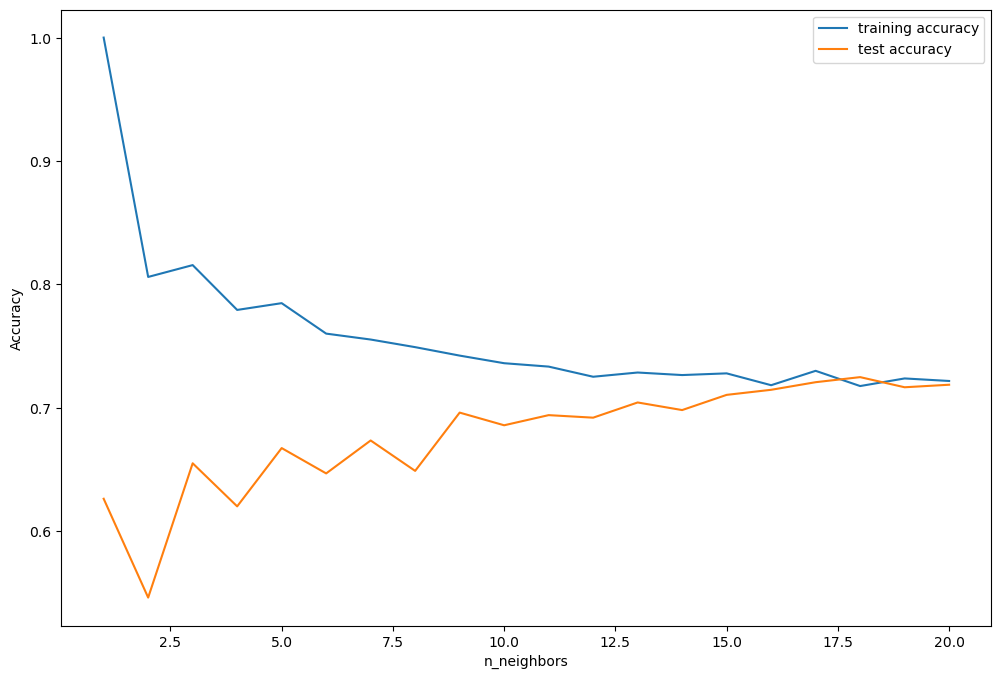

The optimal number of neighbors is: 18


In [586]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(x_data        = cross_sell_data,
                                  y_data        = cross_sell_target,
                                  response_type = 'class')

In [587]:
#Building KNN model with fitted models that are significant at 0.05
cross_sell_data   =  cross_sell.loc[ : , candidate_dict['logistic_fit_1']]
cross_sell_target =  cross_sell.loc[ : , 'CROSS_SELL_SUCCESS']

# train-test split with stratification
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            cross_sell_data, #x-variable
            cross_sell_target, # y-variable
            test_size    = 0.25,
            random_state = 219,
            stratify     = cross_sell_target)



# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(cross_sell_data)


# TRANSFORMING the data
x_scaled = scaler.transform(cross_sell_data)


# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled) 


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(x_test_scaled)

#Calculating the train-test gap
model_gap         = abs(knn_train_score - knn_test_score).round(4) #train-test gap


# SCORING the results
print('Training ACCURACY:', knn_fit.score(x_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(x_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))
print('Train-Test Gap :', model_gap)


# saving scoring data
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)


# saving AUC score and train-test gap
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)
model_gap         = abs(knn_train_score - knn_test_score).round(4) #train-test gap


Training ACCURACY: 0.7416
Testing  ACCURACY: 0.7064
AUC Score        : 0.6027
Train-Test Gap : 0.0523


/Users/tolulopeolokesusi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/tolulopeolokesusi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the val

In [588]:
# unpacking the confusion matrix for KNN model
knn_tree_tn, \
knn_tree_fp, \
knn_tree_fn, \
knn_tree_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {knn_tree_tn}
False Positives: {knn_tree_fp}
False Negatives: {knn_tree_fn}
True Positives : {knn_tree_tp}
""")


True Negatives : 49
False Positives: 107
False Negatives: 36
True Positives : 295



#### Observation
Low AUC score of 0.57 means the model is slightly predicting better than random guessing. The false positives is still on the high which is bad for business

In [589]:
#Hypertunning KNN using fited model with variables that are significant at 0.05
cross_sell_data   =  cross_sell.loc[ : , candidate_dict['logistic_fit_1']]
cross_sell_target =  cross_sell.loc[ : , 'CROSS_SELL_SUCCESS']


# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            cross_sell_data, #x-variable
            cross_sell_target, # y-variable
            test_size    = 0.25,
            random_state = 219,
            stratify     = cross_sell_target)
## GridSearchCV
#########################################
# declaring a hyperparameter space
leaf_size_range   = np.arange(10,30,10)
n_neighbors_range = np.arange(1,20,1)    
weights_range     = ['uniform','distance']



# creating a hyperparameter grid
param_grid = {'leaf_size'    : leaf_size_range,
              'n_neighbors'  : n_neighbors_range,          
              'weights'      : weights_range
             
            } 


# INSTANTIATING the model object without hyperparameters
knn_model = KNeighborsClassifier()


# GridSearchCV object
knn_model_cv = GridSearchCV(estimator  = knn_model, 
                          param_grid = param_grid, 
                          cv         = 3, 
                          scoring    = make_scorer(roc_auc_score,
                                                   needs_threshold = False))


# FITTING to the F
knn_model_cv.fit(x_train,y_train)




# printing the optimal parameters and best score
print("Tuned Parameters  :", knn_model_cv.best_params_)
print("Tuned CV AUC      :", knn_model_cv.best_score_.round(4))

/Users/tolulopeolokesusi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/tolulopeolokesusi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the val

/Users/tolulopeolokesusi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/tolulopeolokesusi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the val

/Users/tolulopeolokesusi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/tolulopeolokesusi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the val

/Users/tolulopeolokesusi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/tolulopeolokesusi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the val

/Users/tolulopeolokesusi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/tolulopeolokesusi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the val

/Users/tolulopeolokesusi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/tolulopeolokesusi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the val

/Users/tolulopeolokesusi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/tolulopeolokesusi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the val

Tuned Parameters  : {'leaf_size': 10, 'n_neighbors': 12, 'weights': 'uniform'}
Tuned CV AUC      : 0.6015


/Users/tolulopeolokesusi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/tolulopeolokesusi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the val

In [590]:
#Building KNN with tunned parameters using fitted model with variables at 0.05 significant.
cross_sell_data   =  cross_sell.loc[ : , candidate_dict['logistic_fit_1']]
cross_sell_target =  cross_sell.loc[ : , 'CROSS_SELL_SUCCESS']


# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(cross_sell_data)


# TRANSFORMING the data
x_scaled     = scaler.transform(cross_sell_data)


# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled) 


# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            cross_sell_data, #x-variable
            cross_sell_target, # y-variable
            test_size    = 0.25,
            random_state = 219,
            stratify     = cross_sell_target)


# INSTANTIATING a KNN classification model with optimal neighbors
fit1_knn_opt = KNeighborsClassifier(leaf_size   = 10, 
                                   n_neighbors = 12,
                                   weights     = 'uniform')


# FITTING the training data
fit1_knn_fit = fit1_knn_opt.fit(x_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
fit1_knn_pred = fit1_knn_fit.predict(x_test_scaled)

#Calculating the train-test gap
model_gap         = abs(knn_train_score - knn_test_score).round(4) #train-test gap



# printing the results
print('Training ACCURACY:', fit1_knn_fit.score(x_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', fit1_knn_fit.score(x_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = fit1_knn_pred).round(4))
print('Train-Test Gap :', model_gap)



# saving scoring data
knn_train_score = fit1_knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score  = fit1_knn_fit.score(x_test_scaled, y_test_scaled).round(4)


# saving AUC score and train-test gap
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = fit1_knn_pred).round(4)
model_gap         = abs(knn_train_score - knn_test_score).round(4) #train-test gap

Training ACCURACY: 0.7402
Testing  ACCURACY: 0.6879
AUC Score        : 0.5975
Train-Test Gap : 0.0352


/Users/tolulopeolokesusi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/tolulopeolokesusi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the val

In [591]:
# unpacking the confusion matrix for KNN model
fit1_knn_tree_tn, \
fit1_knn_tree_fp, \
fit1_knn_tree_fn, \
fit1_knn_tree_tp = confusion_matrix(y_true = y_test, y_pred = fit1_knn_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {fit1_knn_tree_tn}
False Positives: {fit1_knn_tree_fp}
False Negatives: {fit1_knn_tree_fn}
True Positives : {fit1_knn_tree_tp}
""")


True Negatives : 54
False Positives: 102
False Negatives: 50
True Positives : 281



#### Observation
The model with tunned parameters performed slightly better than the model with default parameters. However, the AUC score is still low and the confusion matrix is still predicting a high number of false positives

## GradientBoostingClassifier

#### Unpruned GBM with fitted model with significant at 0.05

In [592]:
#Building Unprunned GBM with significant features at 0.05
cross_sell_data   =  cross_sell.loc[ : , candidate_dict['logistic_fit_1']]
cross_sell_target =  cross_sell.loc[ : , 'CROSS_SELL_SUCCESS']


# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            cross_sell_data, #x-variable
            cross_sell_target, # y-variable
            test_size    = 0.25,
            random_state = 219,
            stratify     = cross_sell_target)


# INSTANTIATING a random forest model with optimal values
fit1_gbm = GradientBoostingClassifier()


# FITTING the training data
fit1_gbm_fit = fit1_gbm.fit(x_train, y_train)


# PREDICTING based on the testing set
fit1_gbm_pred = fit1_gbm.predict(x_test)


# SCORING the results
fit1_gbm_train_score = fit1_gbm.score(x_train, y_train).round(4) # using R-square
fit1_gbm_test_score  = fit1_gbm.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(fit1_gbm_train_score - fit1_gbm_test_score).round(4)


# displaying results
print('Training Score :', fit2_gbm_train_score)
print('Testing Score  :', fit2_gbm_test_score)
print('AUC Score      :', roc_auc_score(y_true  = y_test,
                                          y_score = fit1_gbm_pred).round(4))
print('Train-Test Gap :', model_gap)

Training Score : 0.7615
Testing Score  : 0.7187
AUC Score      : 0.6132
Train-Test Gap : 0.0408


In [593]:
# unpacking the confusion matrix for GBM unprunned
fit1_gbm_tn, \
fit1_gbm_fp, \
fit1_gbm_fn, \
fit1_gbm_tp = confusion_matrix(y_true = y_test, y_pred = fit1_gbm_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {fit1_gbm_tn}
False Positives: {fit1_gbm_fp}
False Negatives: {fit1_gbm_fn}
True Positives : {fit1_gbm_tp}
""")


True Negatives : 49
False Positives: 107
False Negatives: 29
True Positives : 302



In [594]:
# #Hypertunning GBM using fitted model at 0.05 significant

# cross_sell_data   =  cross_sell.loc[ : , candidate_dict['logistic_fit_1']]
# cross_sell_target =  cross_sell.loc[ : , 'CROSS_SELL_SUCCESS']


# # train-test split with stratification
# x_train, x_test, y_train, y_test = train_test_split(
#             cross_sell_data, #x-variable
#             cross_sell_target, # y-variable
#             test_size    = 0.25,
#             random_state = 219,
#             stratify     = cross_sell_target)



# ## GridSearchCV

# # declaring a hyperparameter space
# min_samples_leaf_range  = np.arange(2,12,2)
# max_depth_range         = np.arange(1,10,1)
# learning_rate_range     = np.arange(0.05,0.5,0.05)





# # creating a hyperparameter grid
# param_grid = {'min_samples_leaf'  : min_samples_leaf_range,
#              'max_depth'         : max_depth_range,
#              'learning_rate'     : learning_rate_range,          
             
           
            
#             } 


# # INSTANTIATING the model object without hyperparameters
# GB_model = GradientBoostingClassifier(random_state = 219)

# # GridSearchCV object
# GB_model_cv = GridSearchCV(estimator  = GB_model, 
#                            param_grid = param_grid, 
#                            cv         = 3, 
#                            scoring    = make_scorer(roc_auc_score,
#                                                    needs_threshold = False))


# # FITTING to the FULL DATASET (due to cross-validation)
# GB_model_cv.fit(x_train,y_train)

# # printing the optimal parameters and best score
# print("Tuned Parameters  :", GB_model_cv.best_params_)
# print("Tuned CV AUC      :", GB_model_cv.best_score_.round(4))

In [595]:
#Building GBM with tunned parameters
cross_sell_data   =  cross_sell.loc[ : , candidate_dict['logistic_fit_1']]
cross_sell_target =  cross_sell.loc[ : , 'CROSS_SELL_SUCCESS']


# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            cross_sell_data, #x-variable
            cross_sell_target, # y-variable
            test_size    = 0.25,
            random_state = 219,
            stratify     = cross_sell_target)


# INSTANTIATING a random forest model with optimal values
fit1_gbmp = GradientBoostingClassifier(learning_rate = 0.3,
                                    max_depth = 1,
                                    min_samples_leaf = 4, 
                                    random_state = 219)


# FITTING the training data
fit1_gbmp_fit = fit1_gbmp.fit(x_train, y_train)


# PREDICTING based on the testing set
fit1_gbmp_pred = fit1_gbmp.predict(x_test)


# SCORING the results
fit1_gbmp_train_score = fit1_gbmp.score(x_train, y_train).round(4) # using R-square
fit1_gbmp_test_score  = fit1_gbmp.score(x_test, y_test).round(4)   # using R-square
fit1_gbmp_gap         = abs(fit1_gbmp_train_score - fit1_gbmp_test_score).round(4)


# displaying results
print('Training Score :', fit1_gbmp_train_score)
print('Testing Score  :', fit1_gbmp_test_score)
print('AUC Score      :', roc_auc_score(y_true  = y_test,
                                          y_score = fit1_gbmp_pred).round(4))
print('Train-Test Gap :', fit1_gbmp_gap)

Training Score : 0.7279
Testing Score  : 0.7248
AUC Score      : 0.6213
Train-Test Gap : 0.0031


In [596]:
# unpacking the confusion matrix for fitted variables (DT-Tuned)
fit1_gbmp_tn, \
fit1_gbmp_fp, \
fit1_gbmp_fn, \
fit1_gbmp_tp = confusion_matrix(y_true = y_test, y_pred = fit1_gbmp_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {fit1_gbmp_tn}
False Positives: {fit1_gbmp_fp}
False Negatives: {fit1_gbmp_fn}
True Positives : {fit1_gbmp_tp}
""")


True Negatives : 52
False Positives: 104
False Negatives: 30
True Positives : 301



## DecisionTreeClassifier

#### Unpruned DecisionTreeClassifier 

In [597]:
#Building DecisionTreeClassifier with fitted model at 0.05 significant
# Preparing train-test split for DecisionTreeClassifier

cross_sell_data   =  cross_sell.loc[ : , candidate_dict['logistic_fit_1']]
cross_sell_target =  cross_sell.loc[ : , 'CROSS_SELL_SUCCESS']


# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            cross_sell_data, #x-variable
            cross_sell_target, # y-variable
            test_size    = 0.25,
            random_state = 219,
            stratify     = cross_sell_target)


 # INSTANTIATING a classification tree object
DT_fit1_tree = DecisionTreeClassifier()

# FITTING the training data
DT_fit1_tree_fit = DT_fit1_tree.fit(x_train, y_train)


# PREDICTING on new data
DT_fit1_tree_pred = DT_fit1_tree_fit.predict(x_test)

#Calculating the train-test gap
DT_gap         = abs(DT_fit1_tree_train_score - DT_fit1_tree_test_score).round(4)


# SCORING the model
print('DT_Fit1 Tree Training ACCURACY:', DT_fit1_tree_fit.score(x_train,
                                                     y_train).round(4))

print('DT_Fit_1 Tree Testing ACCURACY :', DT_fit1_tree_fit.score(x_test,
                                                     y_test).round(4))

print('DT_Fit_1 Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = DT_fit1_tree_pred).round(4))
print('Train-Test Gap :', DT_gap)


# saving scoring data for future use
DT_fit1_tree_train_score = DT_fit1_tree_fit.score(x_train, y_train).round(4) # accuracy
DT_fit1_tree_test_score  = DT_fit1_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC score and train-test gap
DT_fit1_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = DT_fit1_tree_pred).round(4) # auc
DT_gap         = abs(DT_fit1_tree_train_score - DT_fit1_tree_test_score).round(4) #train-test gap 

DT_Fit1 Tree Training ACCURACY: 0.9801
DT_Fit_1 Tree Testing ACCURACY : 0.616
DT_Fit_1 Tree AUC Score: 0.5599
Train-Test Gap : 0.3538


In [598]:
# unpacking the confusion matrix for base model (DT)
DT_fit1_tree_tn, \
DT_fit1_tree_fp, \
DT_fit1_tree_fn, \
DT_fit1_tree_tp = confusion_matrix(y_true = y_test, y_pred = DT_fit1_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {DT_fit1_tree_tn}
False Positives: {DT_fit1_tree_fp}
False Negatives: {DT_fit1_tree_fn}
True Positives : {DT_fit1_tree_tp}
""")


True Negatives : 63
False Positives: 93
False Negatives: 94
True Positives : 237



In [599]:
#Building DecisionTreeClassifier with fitted model at 0.15 significant
# Preparing train-test split for DecisionTreeClassifier

cross_sell_data   =  cross_sell.loc[ : , candidate_dict['logistic_fit_2']]
cross_sell_target =  cross_sell.loc[ : , 'CROSS_SELL_SUCCESS']


# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            cross_sell_data, #x-variable
            cross_sell_target, # y-variable
            test_size    = 0.25,
            random_state = 219,
            stratify     = cross_sell_target)


 # INSTANTIATING a classification tree object
DT_fit2_tree = DecisionTreeClassifier()

# FITTING the training data
DT_fit2_tree_fit = DT_fit2_tree.fit(x_train, y_train)


# PREDICTING on new data
DT_fit2_tree_pred = DT_fit2_tree_fit.predict(x_test)

#Calculating the train-test gap
DT2_gap         = abs(DT_fit2_tree_train_score - DTP_fit2_tree_test_score).round(4)



# SCORING the model
print('DT_Fit2 Tree Training ACCURACY:', DT_fit2_tree_fit.score(x_train,
                                                     y_train).round(4))

print('DT_Fit2 Tree Testing ACCURACY :', DT_fit2_tree_fit.score(x_test,
                                                     y_test).round(4))

print('DT_Fit2 Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = DT_fit2_tree_pred).round(4))
print('Train-Test Gap :', DT2_gap)


# saving scoring data for future use
DT_fit2_tree_train_score = DT_fit2_tree_fit.score(x_train, y_train).round(4) # accuracy
DT_fit2_tree_test_score  = DT_fit2_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC and train-test gap
DT_fit1_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = DT_fit2_tree_pred).round(4) # auc
DT2_gap         = abs(DT_fit2_tree_train_score - DTP_fit2_tree_test_score).round(4)#train-test gap

DT_Fit2 Tree Training ACCURACY: 1.0
DT_Fit2 Tree Testing ACCURACY : 0.6037
DT_Fit2 Tree AUC Score: 0.5543
Train-Test Gap : 0.3409


In [600]:
# unpacking the confusion matrix for fitted model (DT)
DT_fit2_tree_tn, \
DT_fit2_tree_fp, \
DT_fit2_tree_fn, \
DT_fit2_tree_tp = confusion_matrix(y_true = y_test, y_pred = DT_fit2_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {DT_fit2_tree_tn}
False Positives: {DT_fit2_tree_fp}
False Negatives: {DT_fit2_tree_fn}
True Positives : {DT_fit2_tree_tp}
""")


True Negatives : 65
False Positives: 91
False Negatives: 102
True Positives : 229



In [601]:
# #Using the full dataset for hypertunning to avoid information loss

# cross_sell_data   =  cross_sell.loc[ : , candidate_dict['logistic_fit_1']]
# cross_sell_target =  cross_sell.loc[ : , 'CROSS_SELL_SUCCESS']


# # train-test split with stratification
# x_train, x_test, y_train, y_test = train_test_split(
#             cross_sell_data, #x-variable
#             cross_sell_target, # y-variable
#             test_size    = 0.25,
#             random_state = 219,
#             stratify     = cross_sell_target)


# # Hyperparameter grid for DecisionTreeRegressor (DT)

# # declaring a hyperparameter space
# criterion_range_DT  = ["gini", "entropy"]                                            # criterion
# splitter_range_DT   = ["best", "random"]                                             # splitter
# depth_range_DT      = np.arange(1,7, 1)                                              # max_depth (It cannot be beyond 8 in the assignment (Set between 1 and 8))
# leaf_range_DT       = np.arange(1, 102, 5)                                           # Min_Sample leaf
# feature_range_DT    = ["auto", "sqrt", "log2"]                                       # max_features


# # creating a hyperparameter grid
# param_grid_DT = {'min_samples_leaf'   : leaf_range_DT ,        # 20 combinations
#                  'max_features'       : feature_range_DT,      # 3 combinations
#                  'criterion'          : criterion_range_DT,    # 2 combinations
#                  'splitter'           : splitter_range_DT ,    # 2 combinations
#                  'max_depth'          : depth_range_DT,        # 6 combinations
                
#              }


# # Hyperparameter Tuning for DecisionTreeClassifier(DT)

# # INSTANTIATING the model object without hyperparameters
# model = DecisionTreeClassifier(random_state = 219)

# # GridSearchCV object
# grid_search = GridSearchCV(estimator  = model,
#                             param_grid = param_grid_DT,
#                             cv         = 3,
#                             scoring    = make_scorer(roc_auc_score,
#                                                      needs_threshold = False))



# # FITTING to the FULL DATASET (due to cross-validation)
# grid_search.fit(x_train, y_train)

# # printing the optimal parameters and best score
# print(f"Tuned Parameters: {grid_search.best_params_}")
# print(f"Tuned AUC-Score:   {grid_search.best_score_}")


In [602]:
#Building DecisionTree with tunned paramters using original dataset

cross_sell_data   =  cross_sell.loc[ : , candidate_dict['logistic_fit_1']]
cross_sell_target =  cross_sell.loc[ : , 'CROSS_SELL_SUCCESS']


# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            cross_sell_data, #x-variable
            cross_sell_target, # y-variable
            test_size    = 0.25,
            random_state = 219,
            stratify     = cross_sell_target)

#Building DecisionTreeClassifier with tuned parameters
# INSTANTIATING a classification tree object
DTP_fit1_tree = DecisionTreeClassifier(max_depth = 3,
                                   splitter = 'best',
                                   criterion = 'entropy', 
                                   min_samples_leaf = 8, 
                                   class_weight = 'balanced',
                                   random_state=219)



# FITTING the training data
DTP_fit1_tree_fit = DTP_fit1_tree.fit(x_train, y_train)


# PREDICTING on new data
DTP_fit1_tree_pred = DTP_fit1_tree_fit.predict(x_test)

DTP_fit1_tree_gap         = abs(DTP_fit1_tree_train_score - DTP_fit1_tree_test_score).round(4)


# SCORING the model
print('Pruned DT_fit1 Training ACCURACY:', DTP_fit1_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Pruned DT_fit1 Testing ACCURACY :', DTP_fit1_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Pruned DT_fit1 AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = DTP_fit1_tree_pred).round(4))
print('Train-Test Gap :', DTP_fit1_tree_gap)



# saving scoring data for future use
DTP_fit1_tree_train_score = DTP_fit1_tree_fit.score(x_train, y_train).round(4) # accuracy
DTP_fit1_tree_test_score  = DTP_fit1_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
DTP_fit1_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = DTP_fit1_tree_pred).round(4) # auc

Pruned DT_fit1 Training ACCURACY: 0.6436
Pruned DT_fit1 Testing ACCURACY : 0.6612
Pruned DT_fit1 AUC Score: 0.6677
Train-Test Gap : 0.0176


In [603]:
# unpacking the confusion matrix for fitted model (DT)
DTP_fit1_tree_tn, \
DTP_fit1_tree_fp, \
DTP_fit1_tree_fn, \
DTP_fit1_tree_tp = confusion_matrix(y_true = y_test, y_pred = DTP_fit1_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {DTP_fit1_tree_tn}
False Positives: {DTP_fit1_tree_fp}
False Negatives: {DTP_fit1_tree_fn}
True Positives : {DTP_fit1_tree_tp}
""")


True Negatives : 107
False Positives: 49
False Negatives: 116
True Positives : 215



In [604]:
#Building DecisionTree with tunned paramters using original dataset

cross_sell_data   =  cross_sell.loc[ : , candidate_dict['logistic_fit_2']]
cross_sell_target =  cross_sell.loc[ : , 'CROSS_SELL_SUCCESS']


# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            cross_sell_data, #x-variable
            cross_sell_target, # y-variable
            test_size    = 0.25,
            random_state = 219,
            stratify     = cross_sell_target)


model_type = 'DecionTreeClassifier'

# INSTANTIATING a classification tree object
DTP_fit2_tree = DecisionTreeClassifier(max_depth = 3,
                                   splitter = 'best', 
                                   criterion = 'entropy',
                                   min_samples_leaf = 10, 
                                   class_weight = 'balanced',
                                   random_state=219)



# FITTING the training data
DTP_fit2_tree_fit = DTP_fit2_tree.fit(x_train, y_train)


# PREDICTING on new data
DTP_fit2_tree_pred = DTP_fit2_tree_fit.predict(x_test)

#calculating train-test gap
DTP_fit2_tree_gap         = abs(DTP_fit2_tree_train_score - DTP_fit2_tree_test_score).round(4)


# SCORING the model
print('Pruned DT_fit2 Training ACCURACY:', DTP_fit2_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Pruned DT_fit2 Testing ACCURACY :', DTP_fit2_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Pruned DT_fit2 AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = DTP_fit2_tree_pred).round(4))
print('Train-Test Gap :', DTP_fit2_tree_gap)



# saving scoring data for future use
DTP_fit2_tree_train_score = DTP_fit2_tree_fit.score(x_train, y_train).round(4) # accuracy
DTP_fit2_tree_test_score  = DTP_fit2_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC and train-test gap
DTP_fit2_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = DTP_fit2_tree_pred).round(4) # auc
DTP_fit2_tree_gap         = abs(DTP_fit2_tree_train_score - DTP_fit2_tree_test_score).round(4) #train-test gap

Pruned DT_fit2 Training ACCURACY: 0.645
Pruned DT_fit2 Testing ACCURACY : 0.6591
Pruned DT_fit2 AUC Score: 0.6662
Train-Test Gap : 0.0141


In [605]:
# unpacking the confusion matrix for fitted model (DT)
DTP_fit2_tree_tn, \
DTP_fit2_tree_fp, \
DTP_fit2_tree_fn, \
DTP_fit2_tree_tp = confusion_matrix(y_true = y_test, y_pred = DTP_fit2_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {DTP_fit2_tree_tn}
False Positives: {DTP_fit2_tree_fp}
False Negatives: {DTP_fit2_tree_fn}
True Positives : {DTP_fit2_tree_tp}
""")


True Negatives : 107
False Positives: 49
False Negatives: 117
True Positives : 214



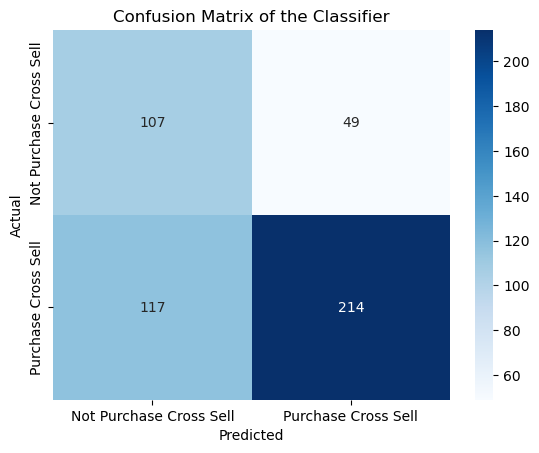

In [606]:
# calling the visual_cm function for base model
visual_cm(true_y = y_test,
          pred_y = DTP_fit2_tree_pred,
          labels = ['Not Purchase Cross Sell', 'Purchase Cross Sell'])

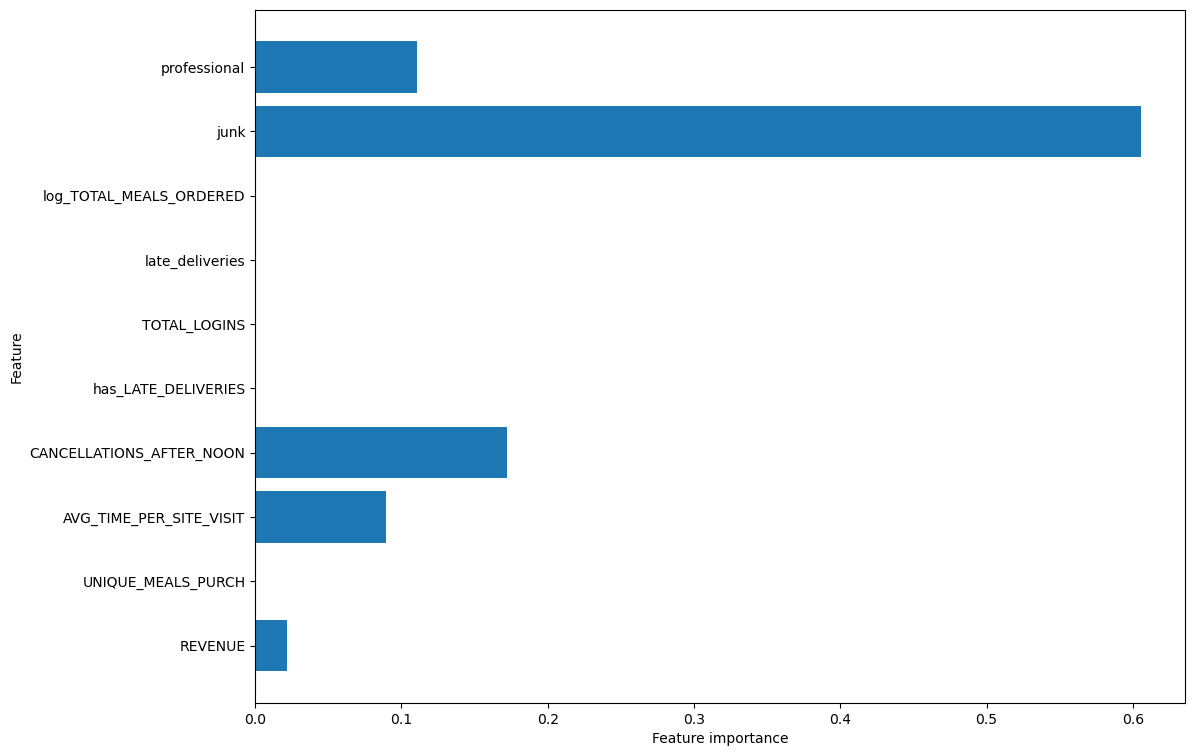

In [607]:
# plotting feature importance
plot_feature_importances(DTP_fit2_tree         ,
                         train = x_train,
                         export = False )

In [608]:
# scoring the results
model_name = 'Decion Tree Classifier'
model_train_score = DTP_fit2_tree_fit.score(x_train, y_train).round(4)
model_test_score  = DTP_fit2_tree_fit.score(x_test, y_test).round(4)   
model_gap         = abs(model_train_score - model_test_score).round(4)

# unpacking the confusion matrix for fitted model (DT)
DTP_fit2_tree_tn, \
DTP_fit2_tree_fp, \
DTP_fit2_tree_fn, \
DTP_fit2_tree_tp = confusion_matrix(y_true = y_test, y_pred = DTP_fit2_tree_pred).ravel()

# displaying results

print(f"""                         
Model Name:                {model_name}
Training ACCURACY:         {model_train_score}
Testing  ACCURACY:         {model_test_score}
Train-Test Gap:            {model_gap}
ROC_AUC_SCORE:             {roc_auc_score(y_true  = y_test, y_score = DTP_fit2_tree_pred).round(4)}
 
Confusion Matrix:          True Negatives : {DTP_fit2_tree_tn}
                           False Positives: {DTP_fit2_tree_fp}
                           False Negatives: {DTP_fit2_tree_fn}
                           True Positives : {DTP_fit2_tree_tp}
""")

                         
Model Name:                Decion Tree Classifier
Training ACCURACY:         0.645
Testing  ACCURACY:         0.6591
Train-Test Gap:            0.0141
ROC_AUC_SCORE:             0.6662
 
Confusion Matrix:          True Negatives : 107
                           False Positives: 49
                           False Negatives: 117
                           True Positives : 214



# Results
The best performing model was the Decision Tree Classifier. The accuracy of the model is calculated for both the training and testing sets. The accuracy of the training set is 0.645, which indicates that the model correctly classified 64.5% of the data in the training set. The accuracy of the testing set is 0.6591, which indicates that the model correctly classified 65.91% of the examples in the testing set.

The difference between the training accuracy and testing accuracy is 0.0141, which is relatively small, indicating that the model is not overfitting to the training data.

The ROC AUC score is 0.6662, which is slightly higher than 0.5, indicating that the model is better than random guessing.

The confusion matrix shows the number of true positives, false positives, false negatives, and true negatives. The true negatives are 107, meaning that 107 customers were correctly classified that they will not purchase cross-sell. The false positives are 49, meaning that 49 customers were incorrectly classified that they will purchase cross-sell when they did not. The false negatives are 117, meaning that 117 customers were incorrectly classified that they will not purchase cross-sell when they did. The true positives are 214, meaning that 214 customers were correctly classified that they will purchase cross-sell.

In conclusion, the model is able to predict whether an apprentice chef customer will cross-sell wine or not with an accuracy of 65.91%. However, there is still room for improvement, as the false positive and false negative rates are relatively high. 

In cross-selling wine, a false positive would occur when the model predicts that a customer will buy wine, but in reality, the customer does not buy wine. False positives are costly for a business because they can lead to wasted resources, such as marketing efforts and sales promotions, that were targeted towards the customers who were predicted to buy wine but did not actually buy it.



False negative, on the other hand, means that the model predicted that a customer will not buy wine, but in reality, the customer buys wine. False negatives can be even more costly than false positives for a business because they can lead to missed opportunities for revenue generation.

Therefore, minimizing false positives and false negatives is essential for a business to increase its revenue and optimize its resources <a>https://blog.hubspot.com/sales/cross-selling</a> .


 

# References


HubSpot. (n.d.). Cross-selling: Strategies and Examples for Growing Your Business. Retrieved from <a>https://blog.hubspot.com/sales/cross-selling</a>

Griffith, E. (2018, June 13). The Power of Cross-Selling and Up-Selling. Forbes. Retrieved from 

<a>https://www.forbes.com/sites/forbescommunicationscouncil/2018/06/13/the-power-of-cross-selling-and-up-selling/?sh=394d7f0e1879</a>


